In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [9]:
df_description = pd.read_csv("description.csv")
df_description

Unnamed: 0                         Table                    Row  \
0             1  application_{train|test}.csv             SK_ID_CURR   
1             2  application_{train|test}.csv                 TARGET   
2             5  application_{train|test}.csv     NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv            CODE_GENDER   
4             7  application_{train|test}.csv           FLAG_OWN_CAR   
..          ...                           ...                    ...   
214         217     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215         218     installments_payments.csv        DAYS_INSTALMENT   
216         219     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217         220     installments_payments.csv         AMT_INSTALMENT   
218         221     installments_payments.csv            AMT_PAYMENT   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
214            On which installment we observe payment   
215  When the installment of previous credit was su...   
216  When was the installments of previous credit p...   
217  What was the prescribed installment amount of ...   
218  What the client actually paid on previous cred...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 5 columns]

In [10]:
data_files = ['application_train.csv', 'application_test.csv']
data = [pd.read_csv(file) for file in data_files]
dataTrain = data[0] # перший елемент списку містить даних з файлу "application_train.csv"
dataTest = data[1] # другий елемент списку містить даних з файлу "application_test.csv"
dataTrain

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [12]:
dataTest

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    0                0                        0.0   
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        NaN   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        NaN   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            NaN                         NaN   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        NaN                         NaN   
48741                        0.0           

In [13]:
print(dataTrain.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [14]:
print(dataTest.dtypes)

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object


In [15]:
print(f"Train data shape: {dataTrain.shape}")
print(f"Test data shape: {dataTest.shape}")

Train data shape: (307511, 122)
Test data shape: (48744, 121)


In [16]:
copied = dataTrain.copy()
copied.drop(columns=list(dataTest.columns), inplace=True)

In [17]:
print("Missing values in train data:")
print(dataTrain.isnull().sum())
print("\nMissing values in test data:")
print(dataTest.isnull().sum())

Missing values in train data:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Missing values in test data:
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64


In [22]:
print("Percentage of missing values in train data:")
print(dataTrain.isnull().sum() / dataTrain.shape[0] * 100)

print("\nPercentage of missing values in test data:")
print(dataTest.isnull().sum() / dataTest.shape[0] * 100)

Percentage of missing values in train data:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 72, dtype: float64

Percentage of missing values in test data:
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Lengt

In [18]:
print("Features with highest percentage of missing values in train data:")
print((dataTrain.isnull().sum() / dataTrain.shape[0] * 100).sort_values(ascending=False))
print("\nFeatures with highest percentage of missing values in test data:")
print((dataTest.isnull().sum() / dataTest.shape[0] * 100).sort_values(ascending=False))

Features with highest percentage of missing values in train data:
COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

Features with highest percentage of missing values in test data:
COMMONAREA_AVG              68.716150
COMMONAREA_MODE             68.716150
COMMONAREA_MEDI             68.716150
NONLIVINGAPARTMENTS_AVG     68.412523
NONLIVINGAPARTMENTS_MODE    68.412523
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Leng

In [51]:
featuresToDelete = [
'COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG',
'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE',
'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG',
'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI',
'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG',
'HOUSETYPE_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE'
]

dataTrain = pd.read_csv('application_train.csv').drop(columns=featuresToDelete)
dataTest = pd.read_csv('application_test.csv').drop(columns=featuresToDelete)

In [19]:
#визначимо чи є дублікати в датасетах
print(f"Train dataset has {dataTrain.duplicated().sum()} duplicates")
print(f"Test dataset has {dataTest.duplicated().sum()} duplicates")

Train dataset has 0 duplicates
Test dataset has 0 duplicates


In [24]:
#подивимось які фічі є категоріальними та числовими
categoricalFeatures = dataTrain.select_dtypes(exclude=['float64', 'int64']).columns
numericalFeatures = dataTrain.select_dtypes(include=['float64', 'int64']).columns

print(f"Categorical features: {categoricalFeatures}")
print(f"Numerical features: {numericalFeatures}")

Categorical features: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Numerical features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


In [25]:
#Виведемо деякі статистичні дані з dataTrain, включаючи категоріальні
dataTrain_stats = dataTrain.describe(include='all')
print(dataTrain_stats)

           SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
uni

In [58]:
#Виведемо статистичні дані для dataTest
dataTest_stats = dataTest.describe(include='all')
print(dataTest_stats)

           SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    48744.000000              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            48744  48744.000000      4.874400e+04  4.874400e+04   
unique               2     

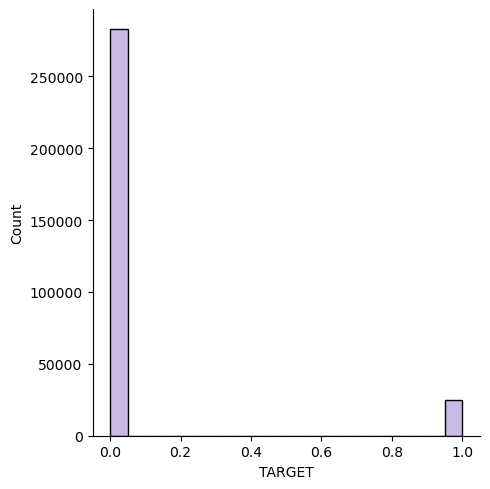

In [26]:
#Визначимо наскільки датасет для тренування збалансований
sns.displot(dataTrain['TARGET'])

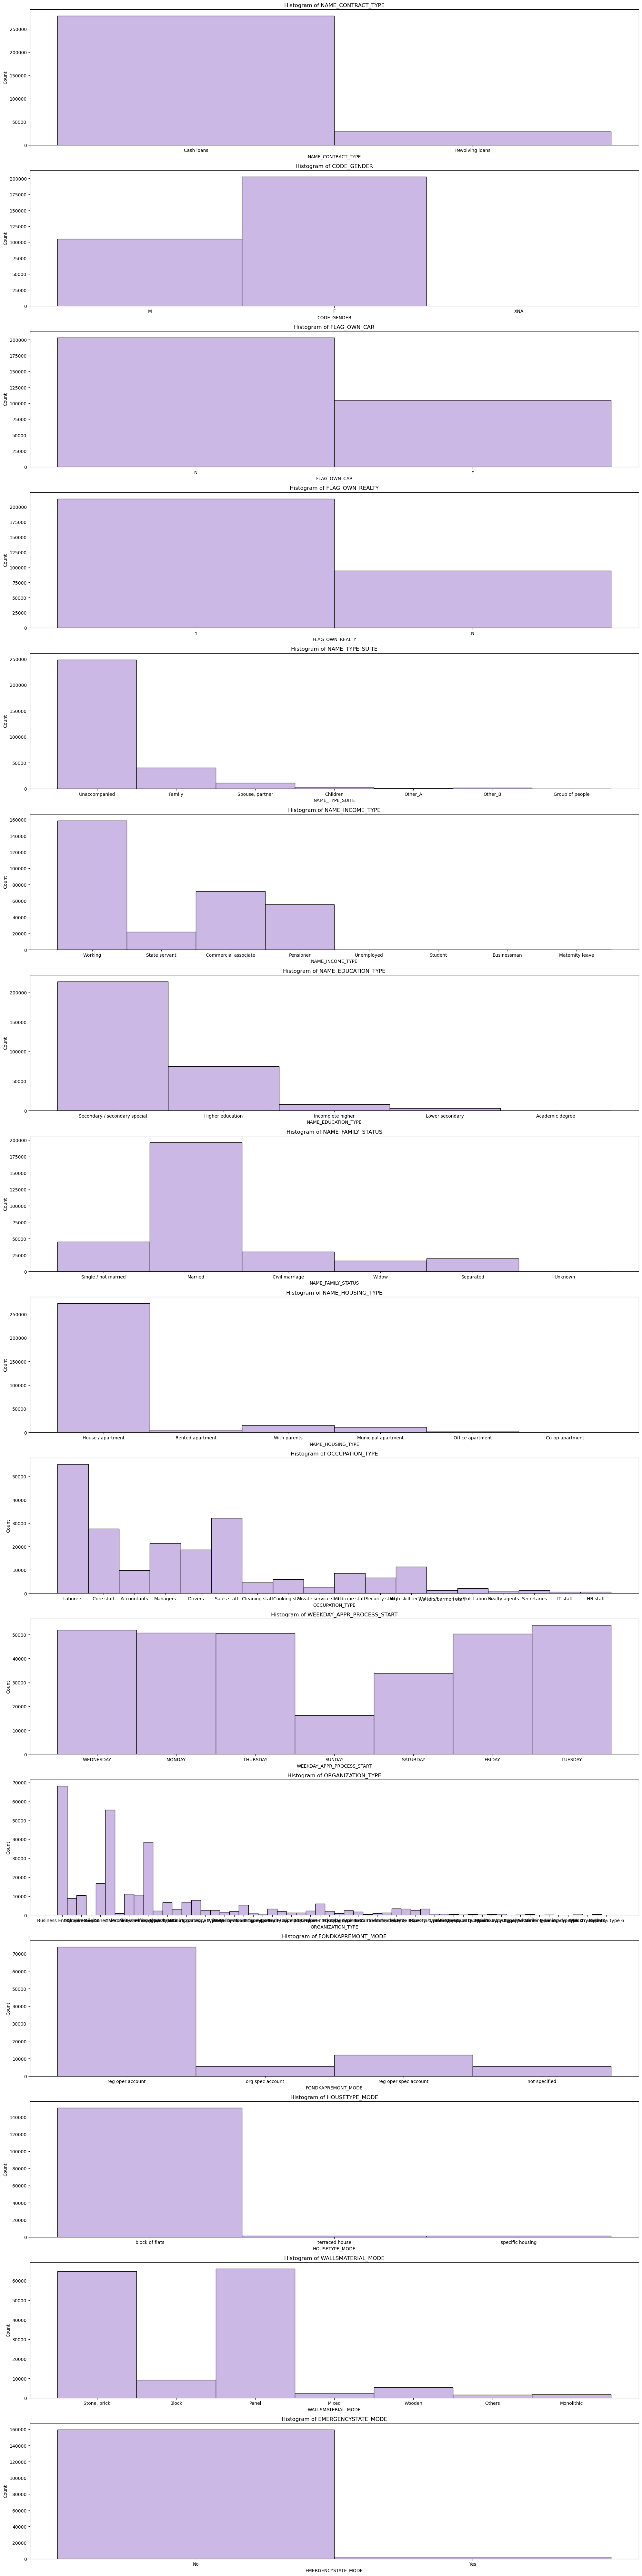

In [27]:
palette = ["#bca0dc"]
sns.set_palette(palette=palette)
fig, axes = plt.subplots(nrows=len(categoricalFeatures), ncols=1, figsize=(20, len(categoricalFeatures)*5))
for i, col in enumerate(categoricalFeatures):
    sns.histplot(dataTrain[col], kde=False, color='C1', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

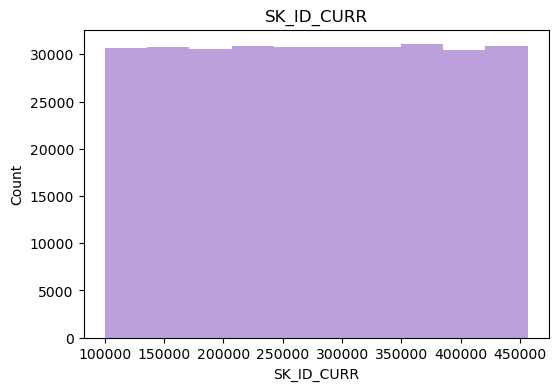

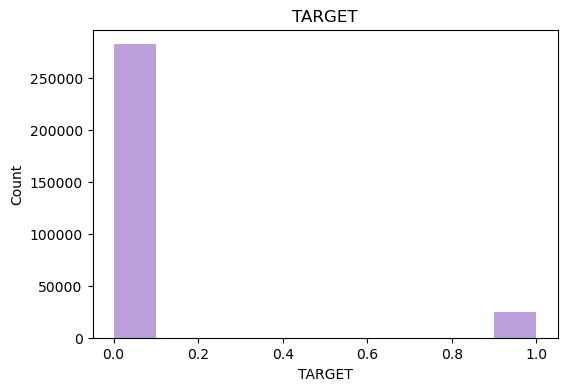

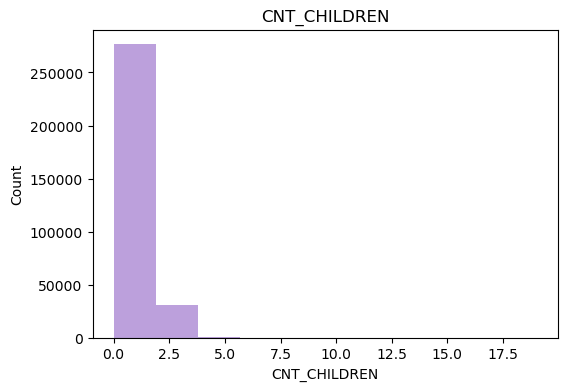

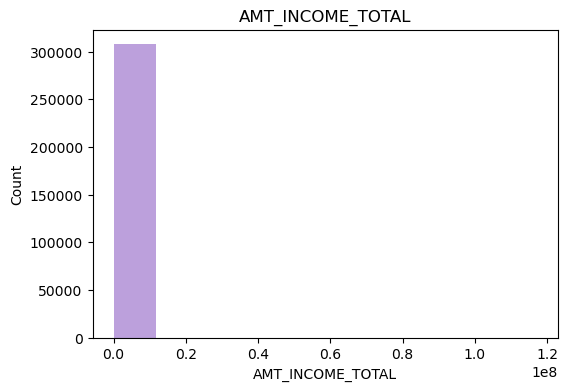

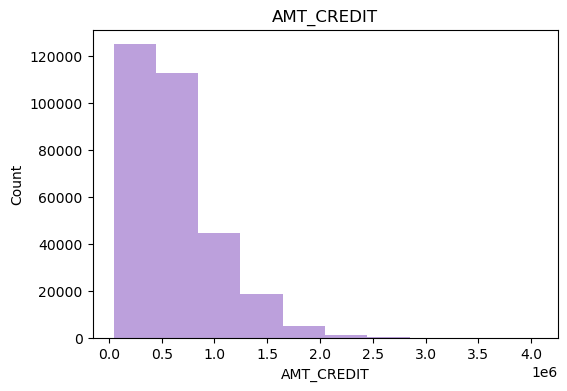

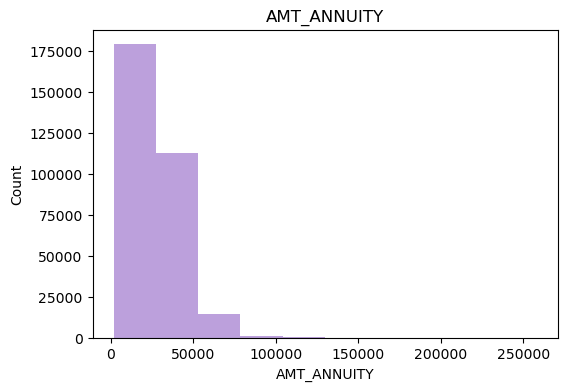

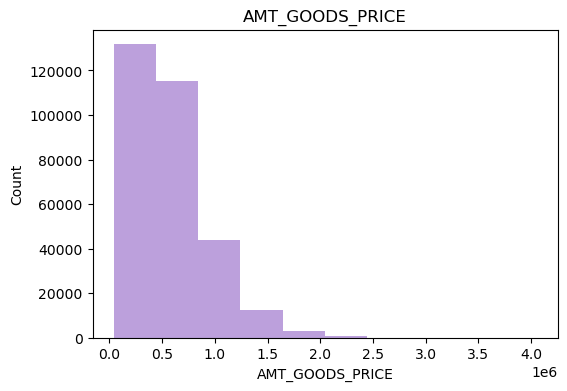

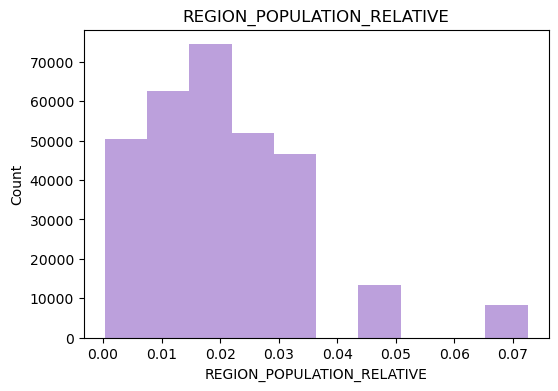

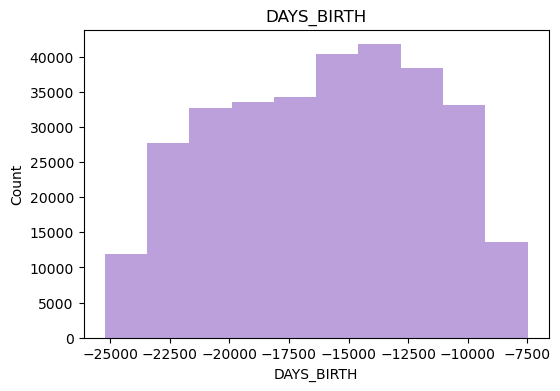

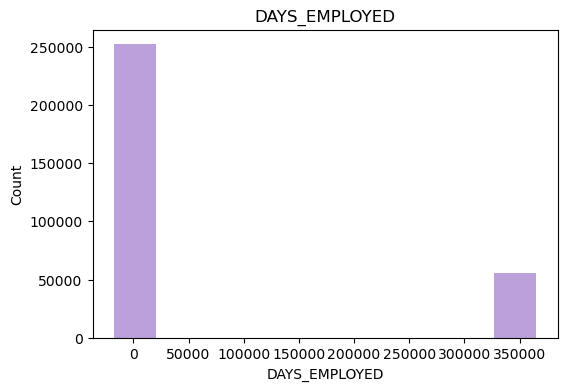

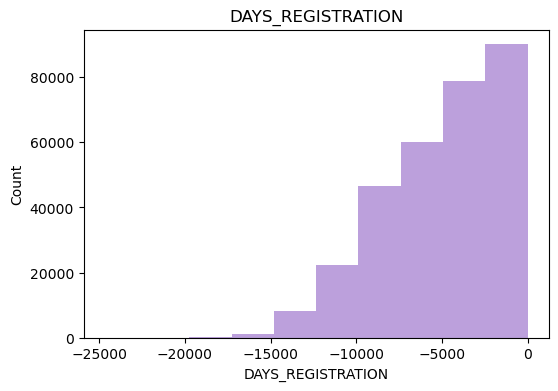

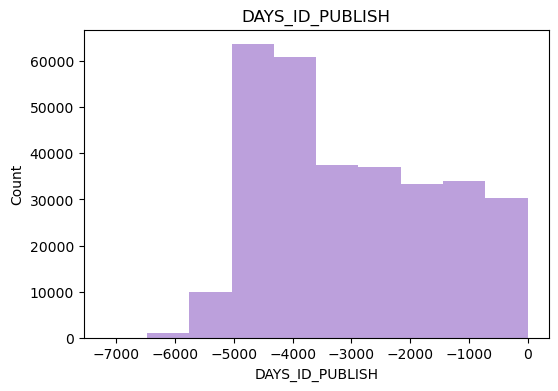

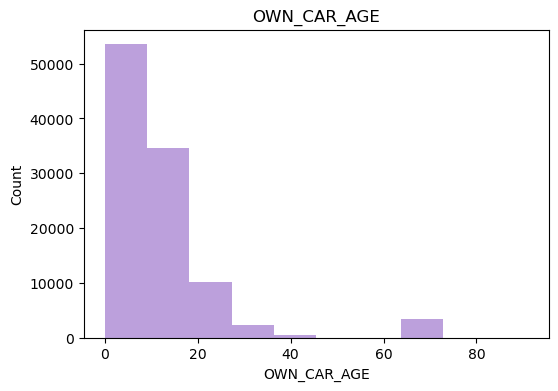

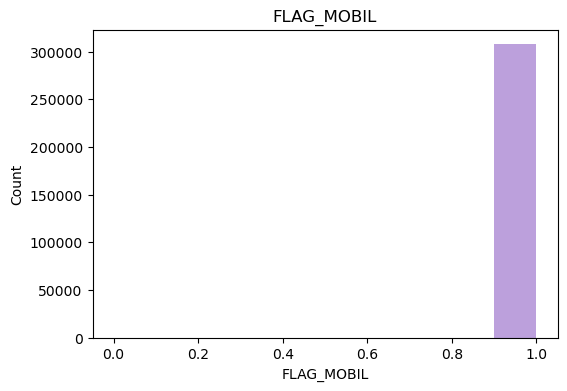

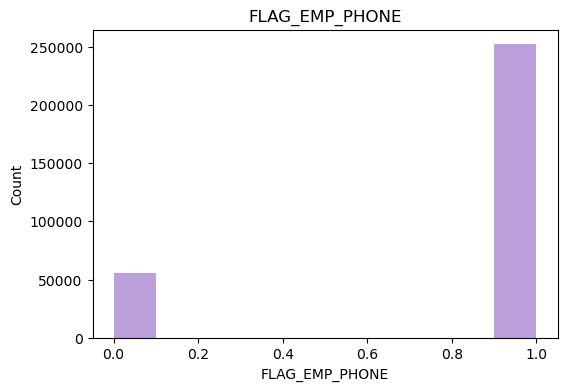

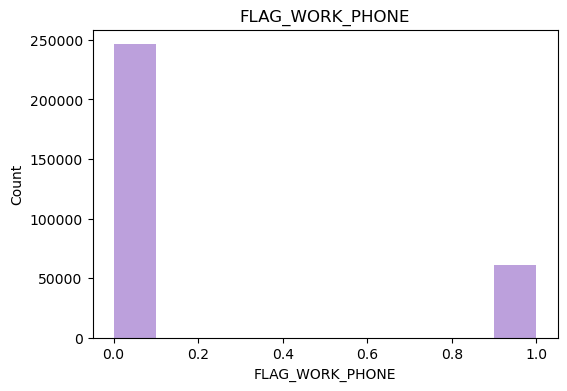

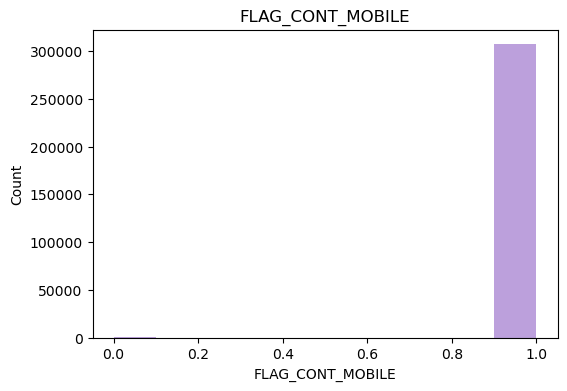

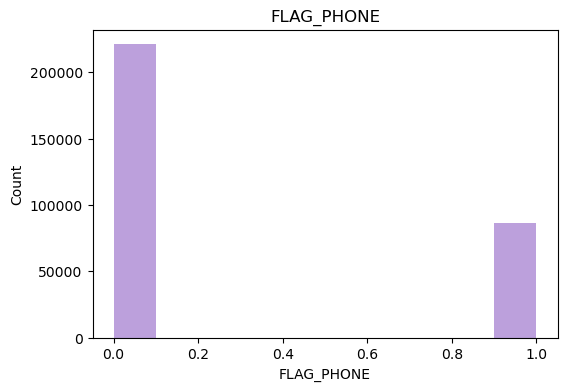

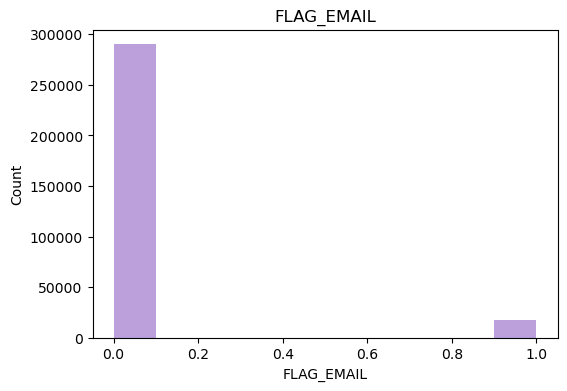

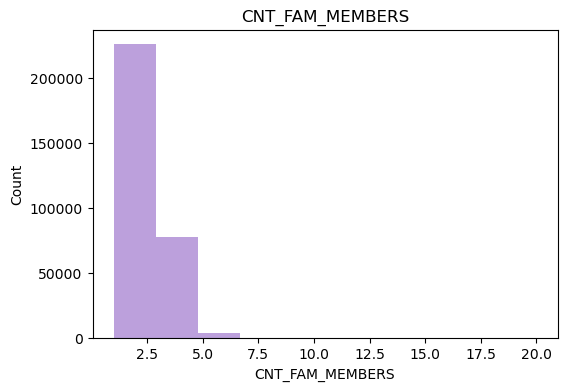

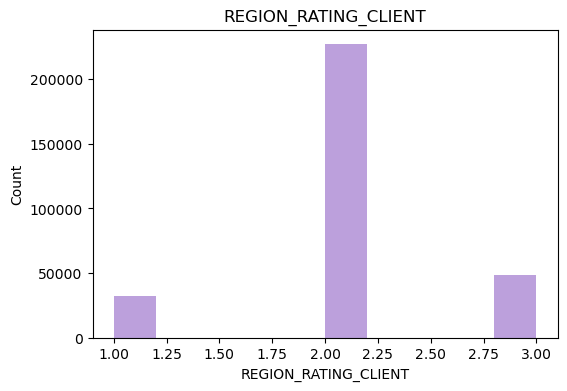

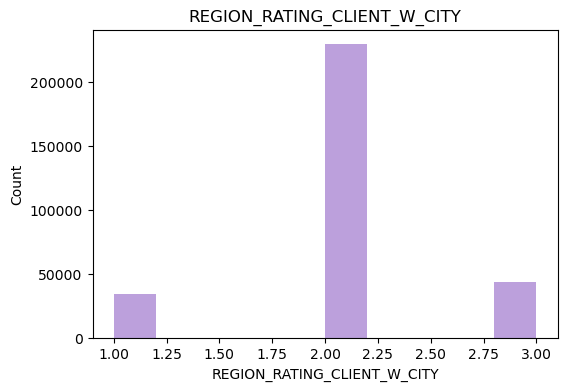

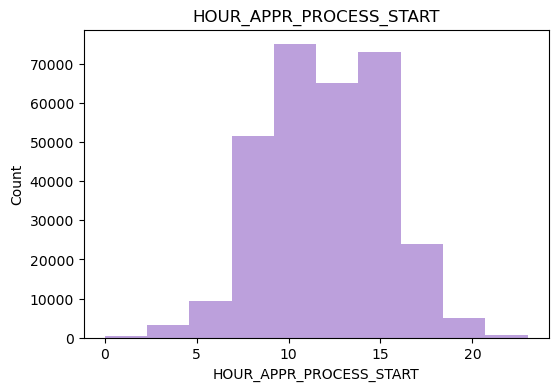

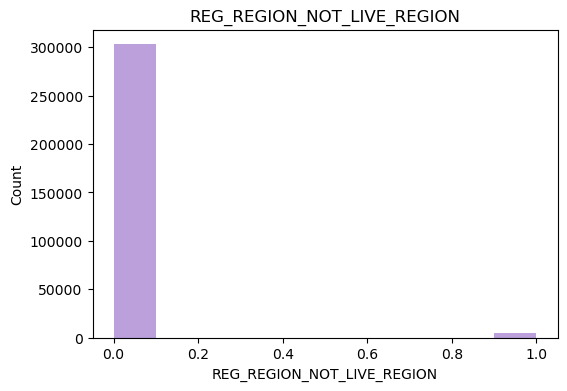

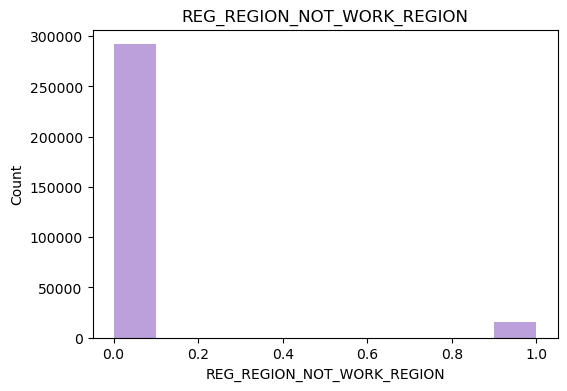

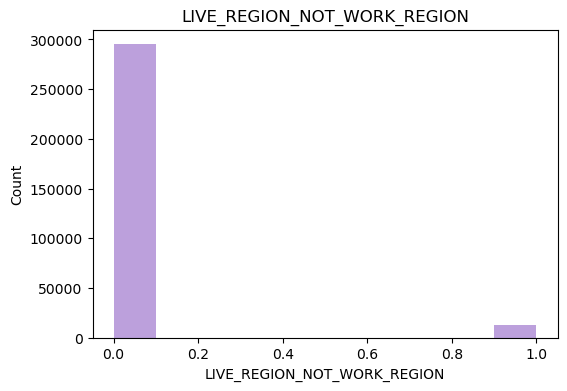

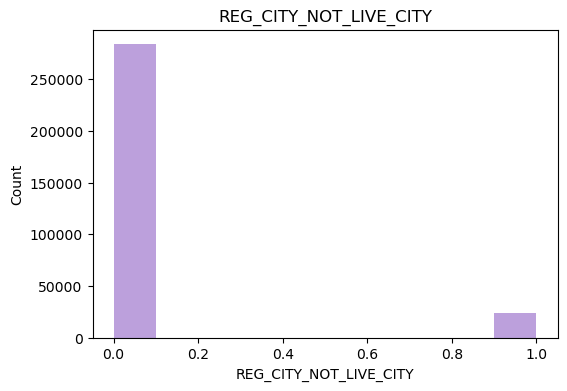

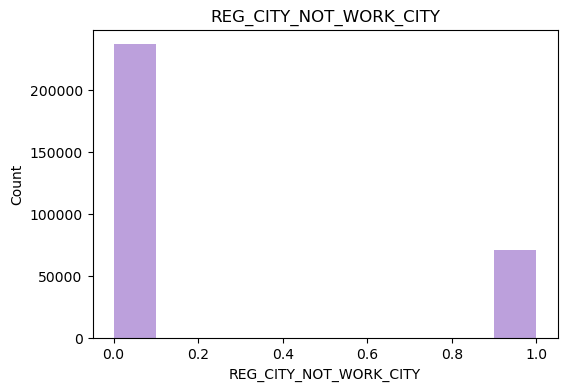

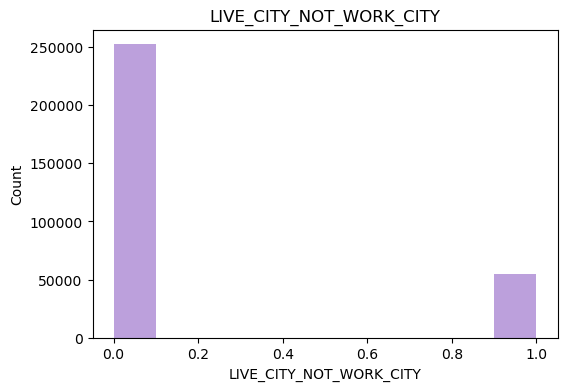

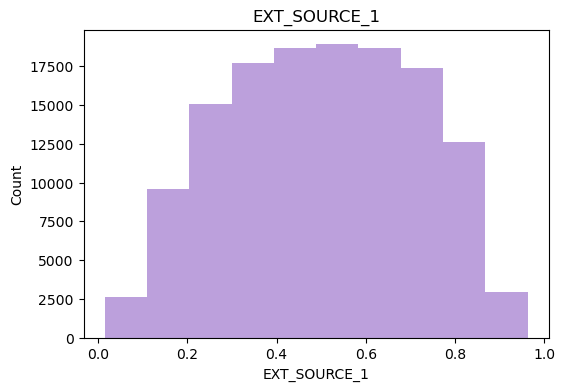

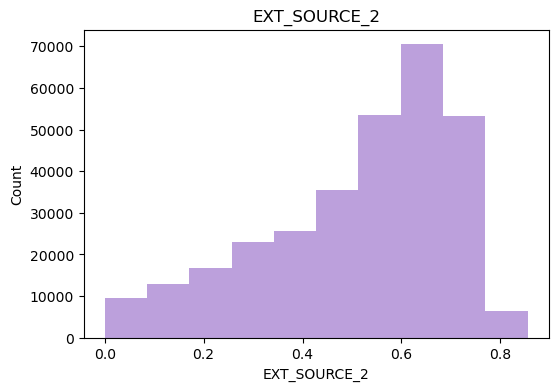

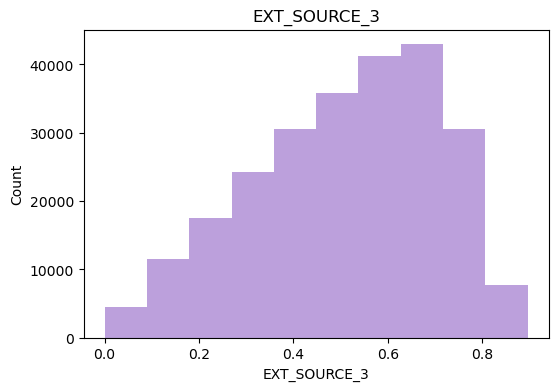

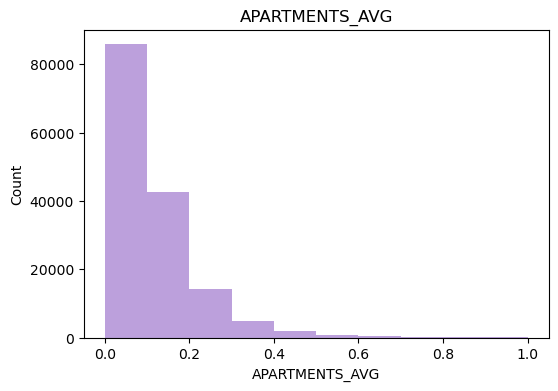

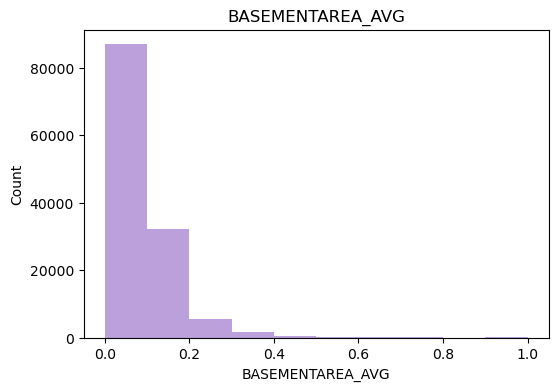

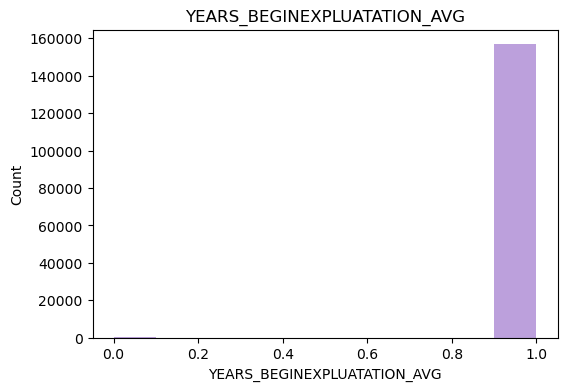

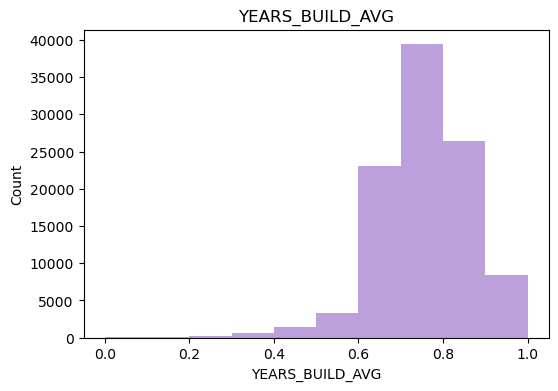

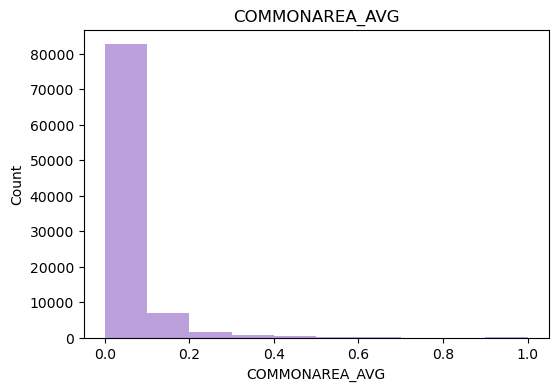

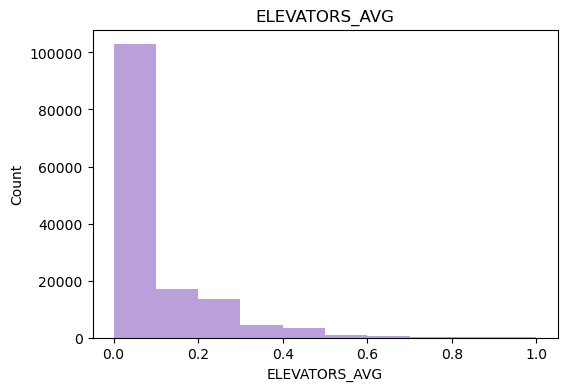

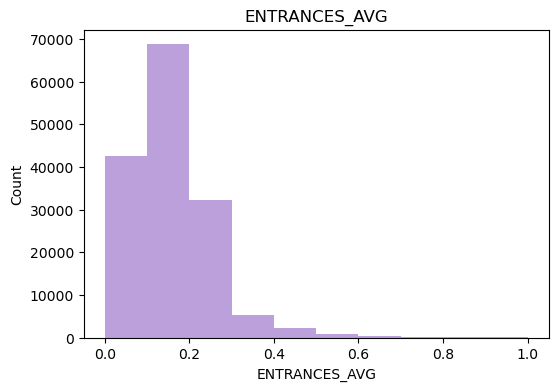

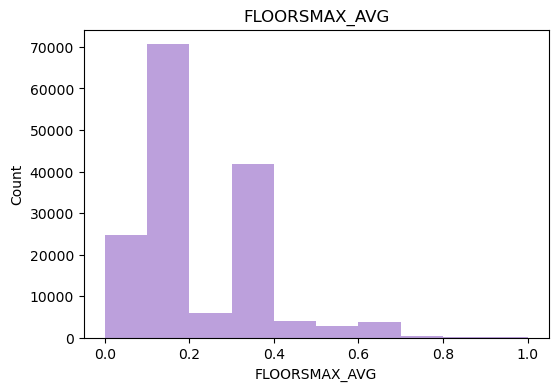

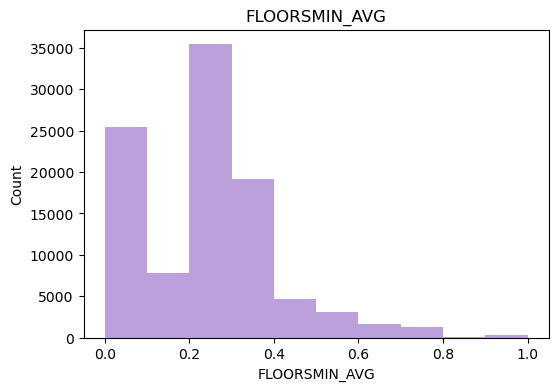

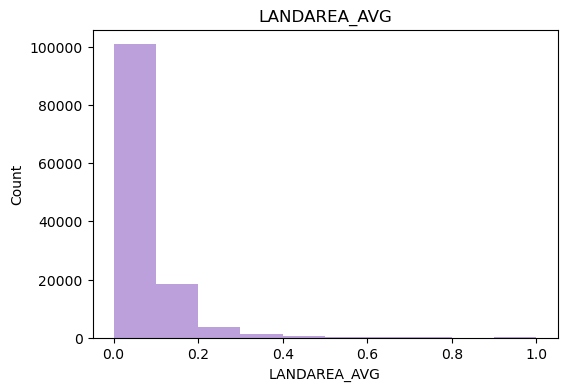

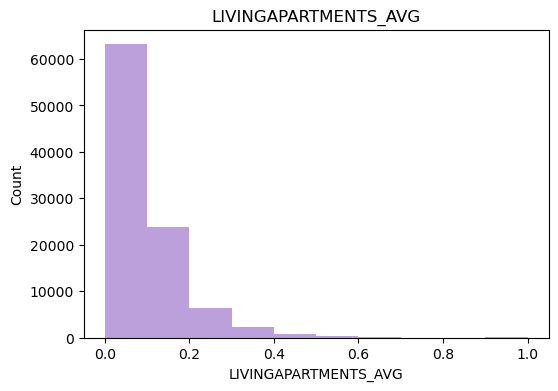

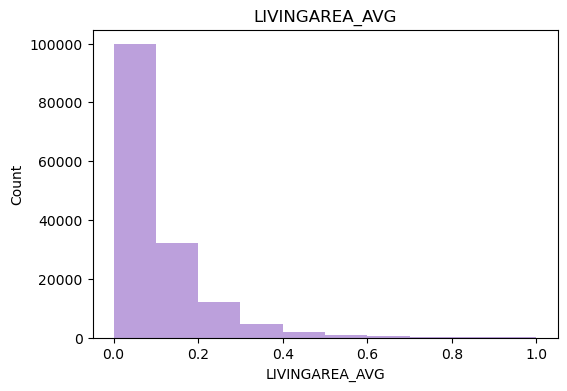

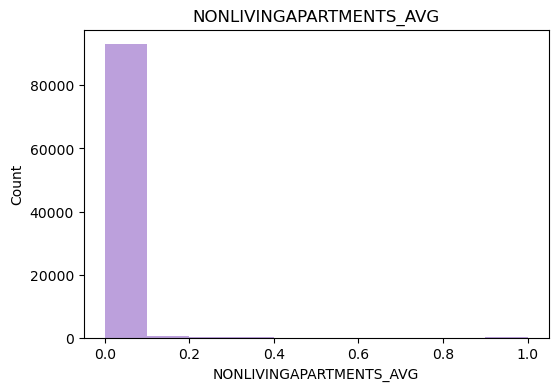

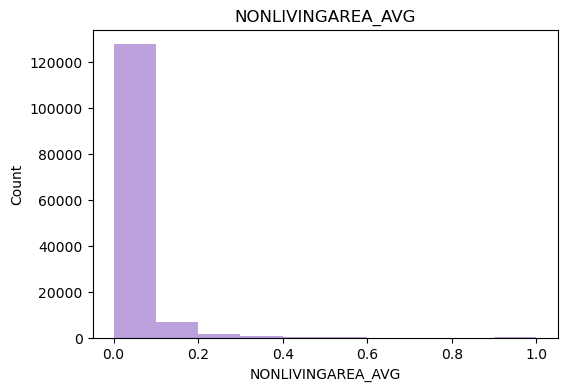

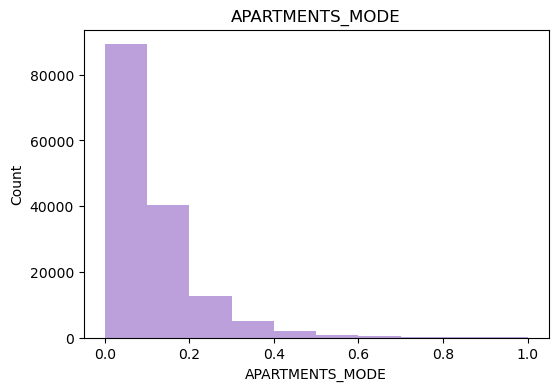

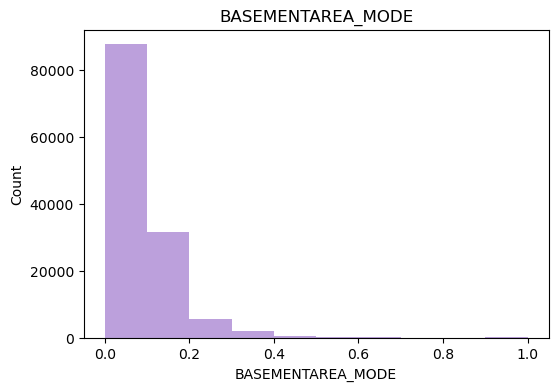

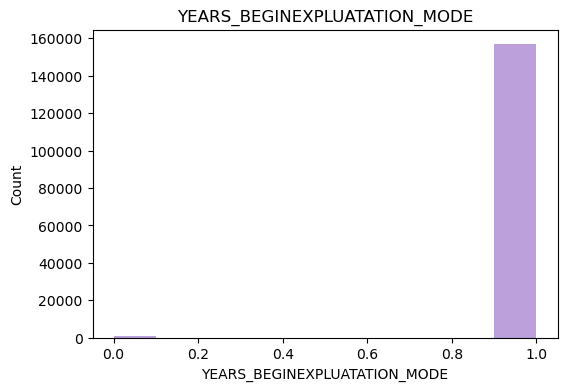

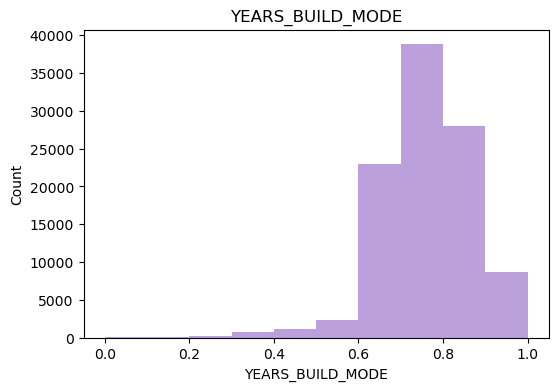

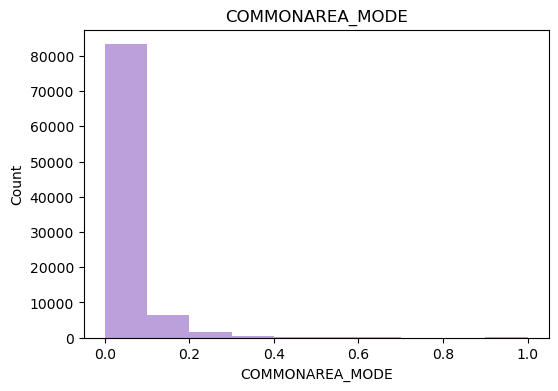

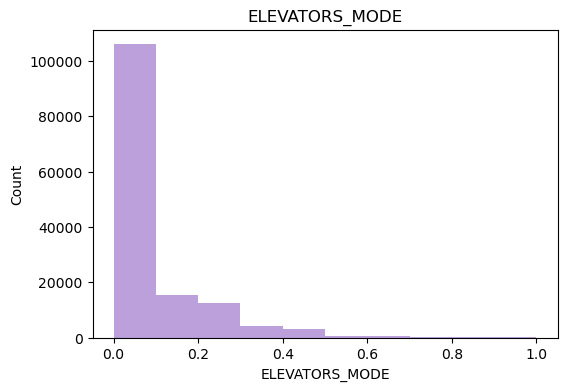

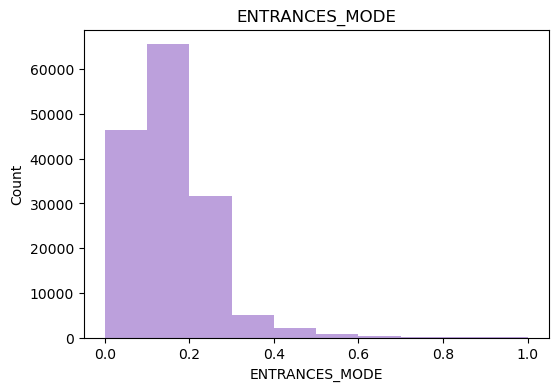

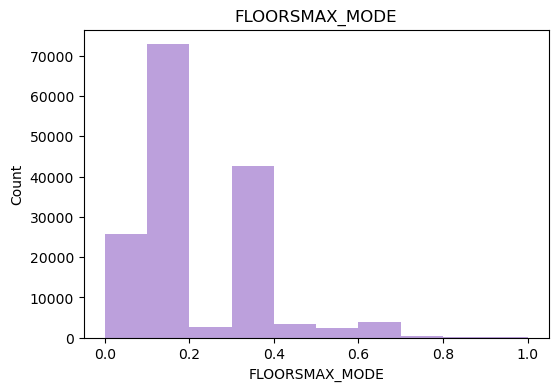

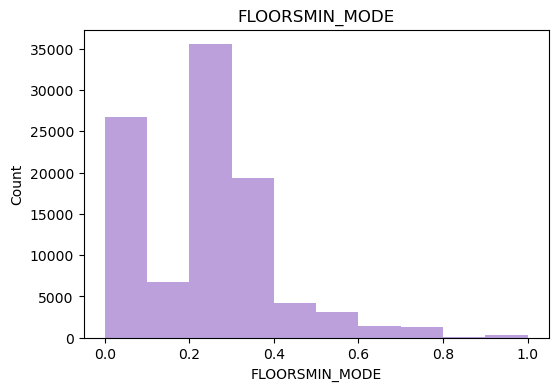

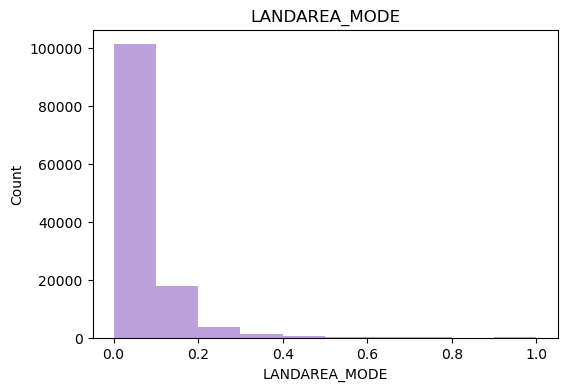

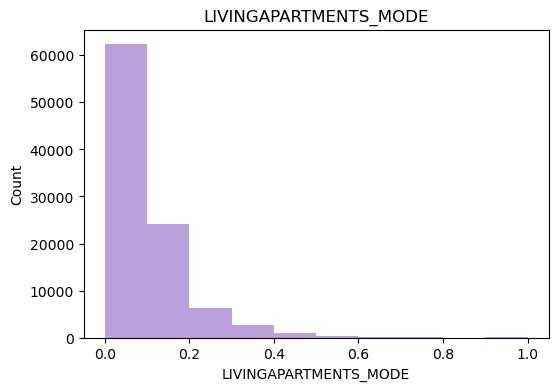

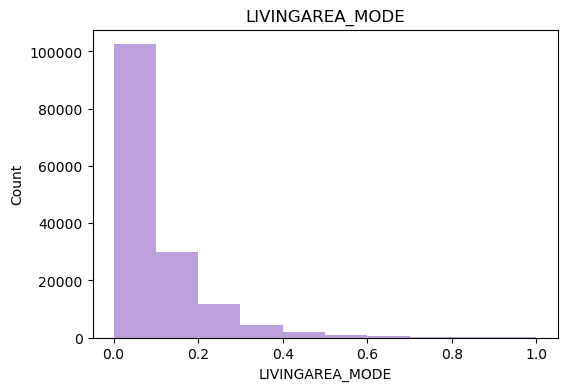

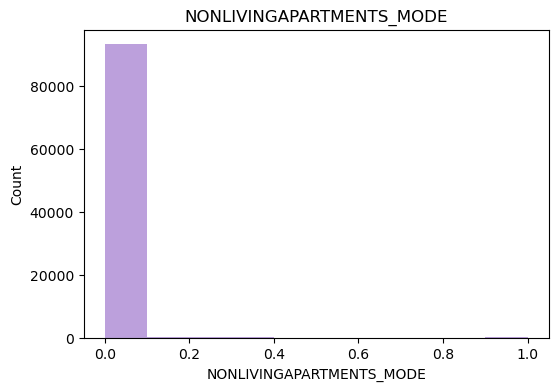

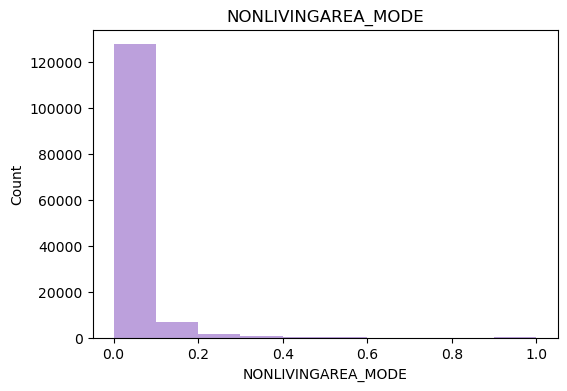

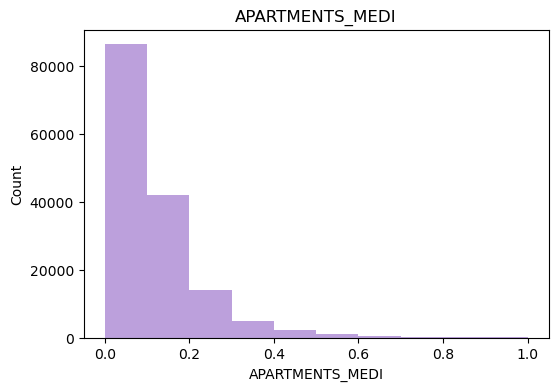

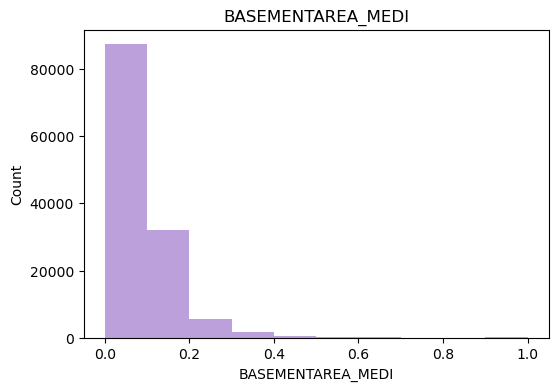

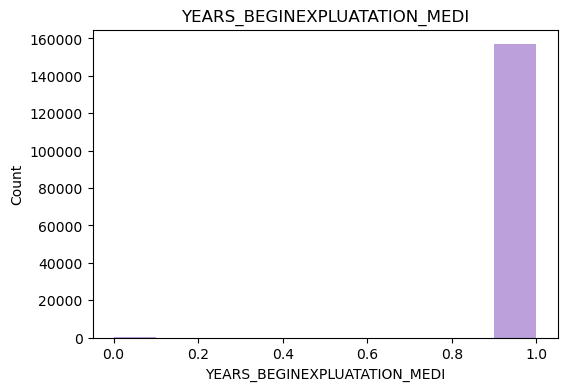

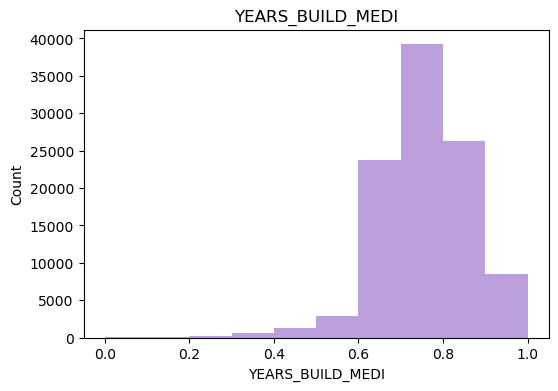

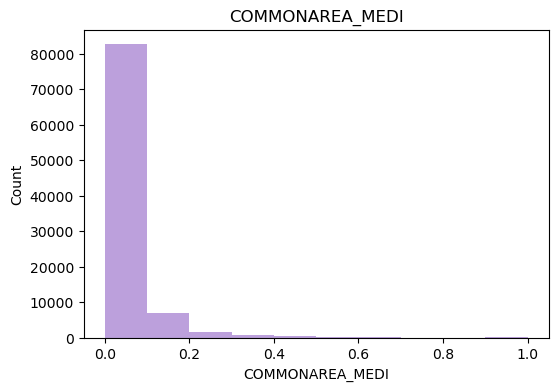

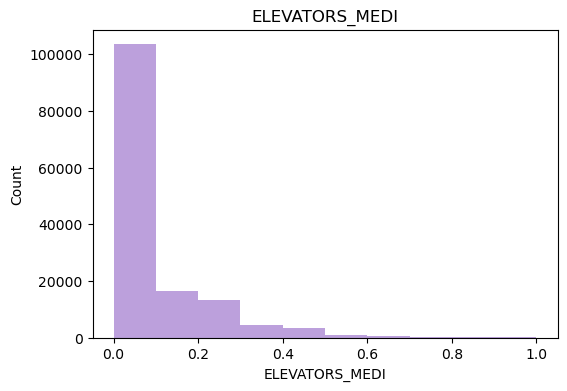

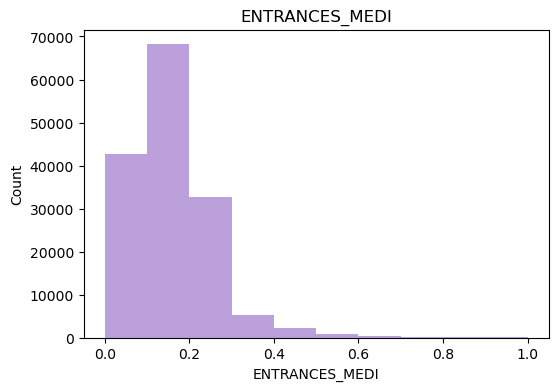

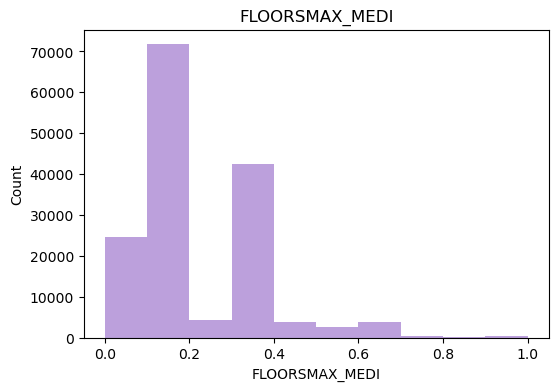

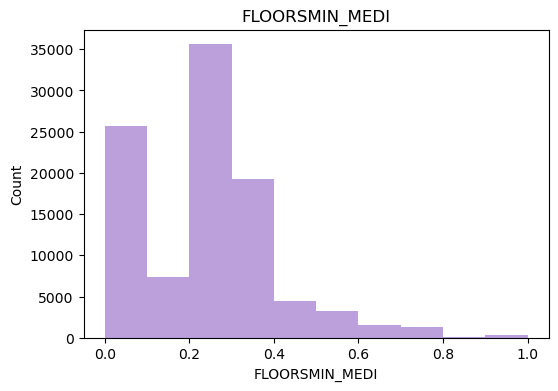

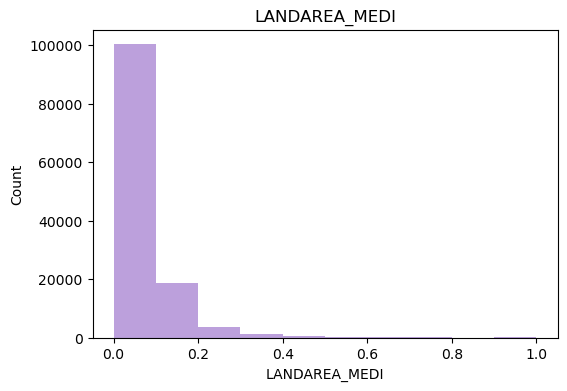

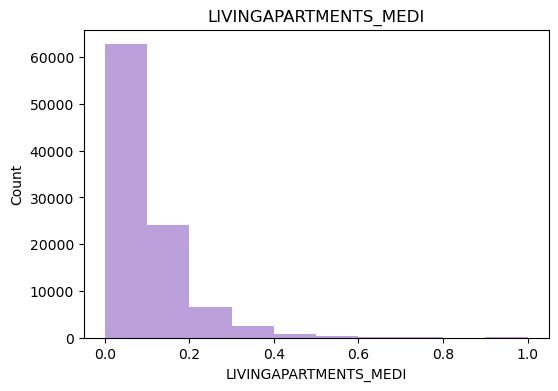

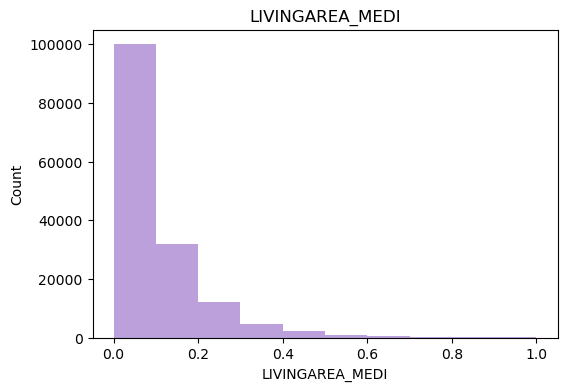

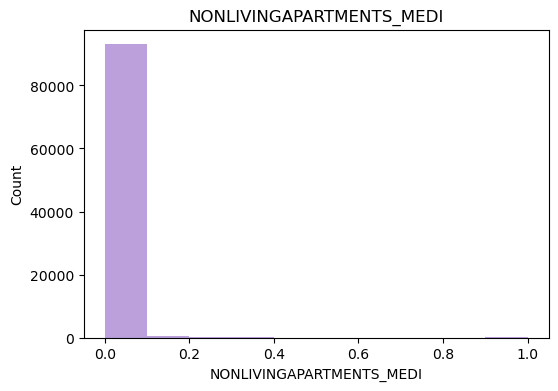

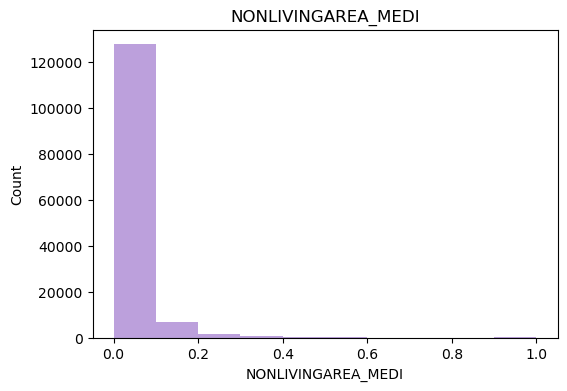

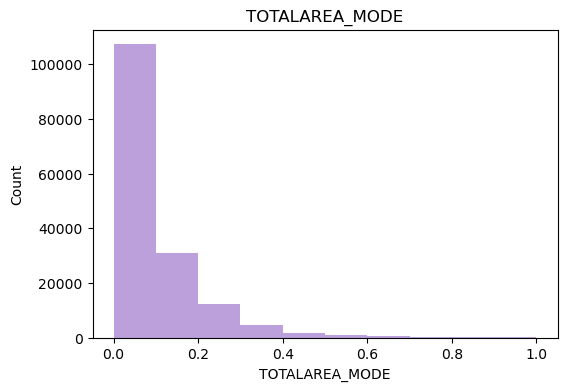

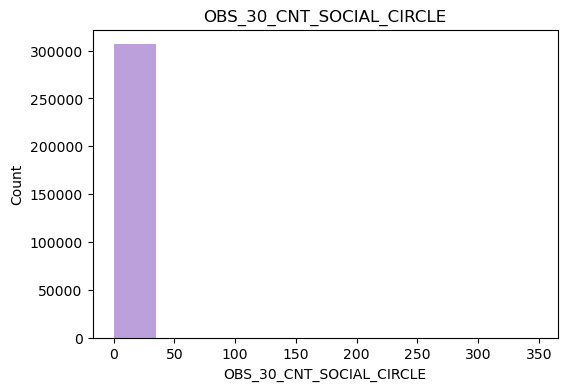

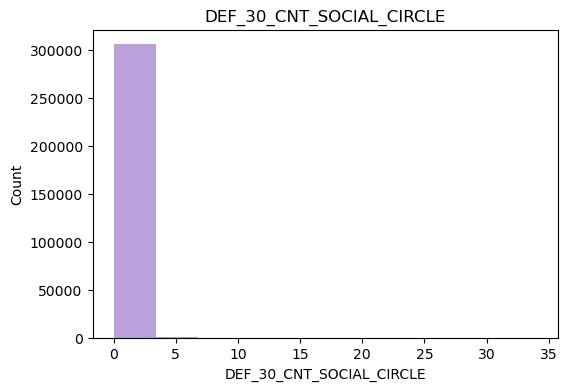

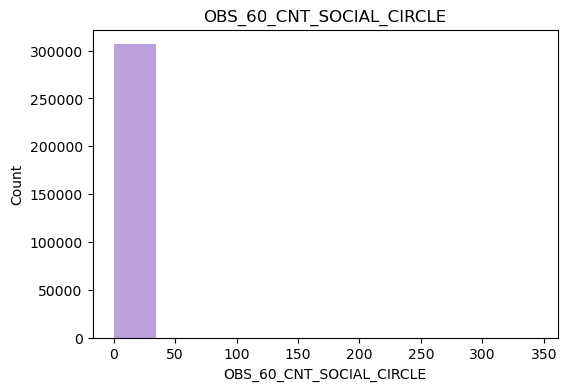

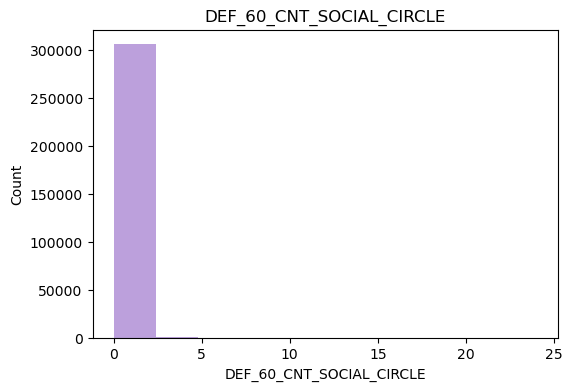

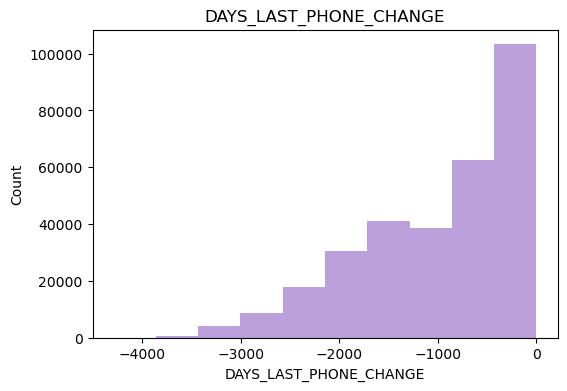

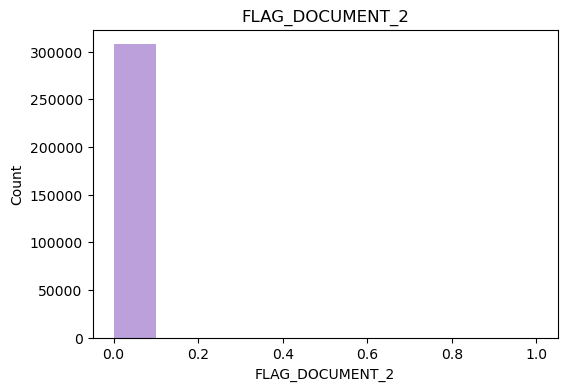

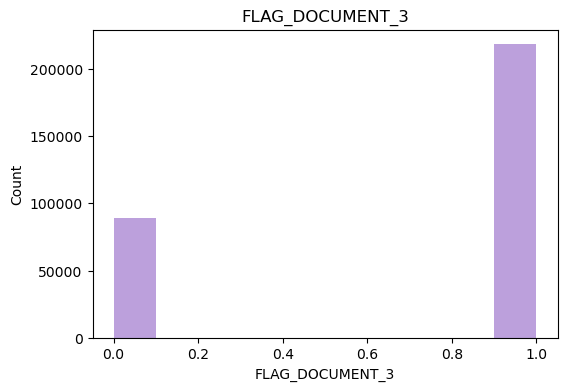

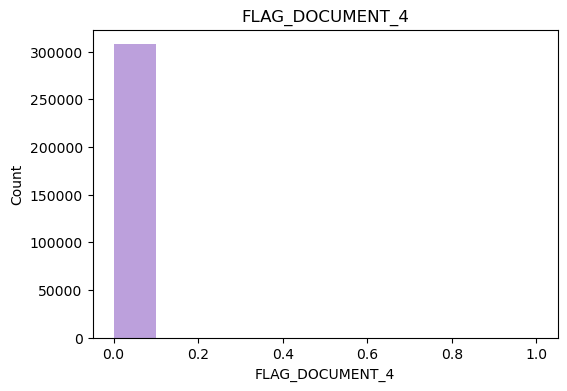

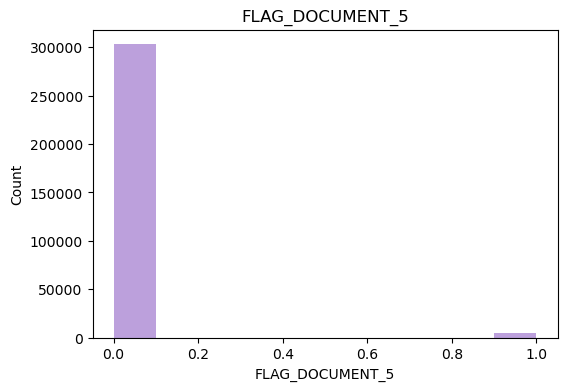

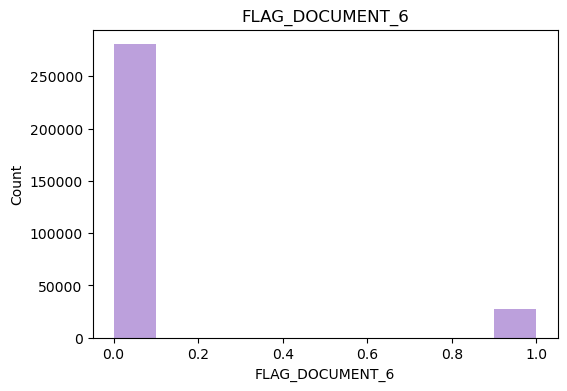

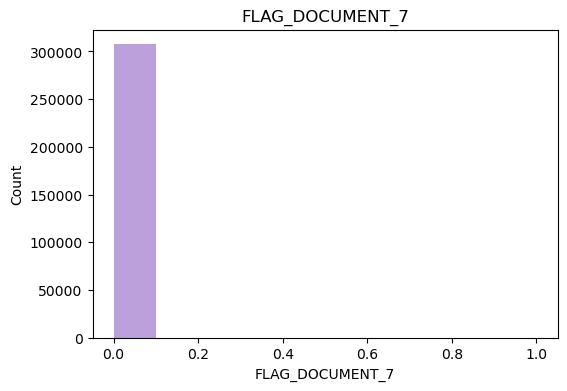

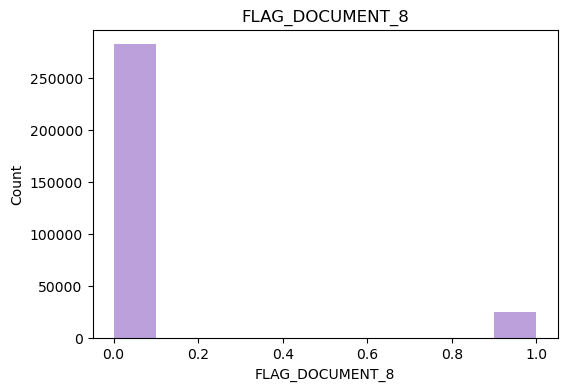

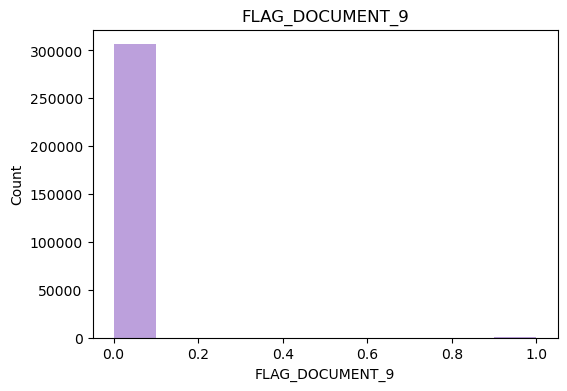

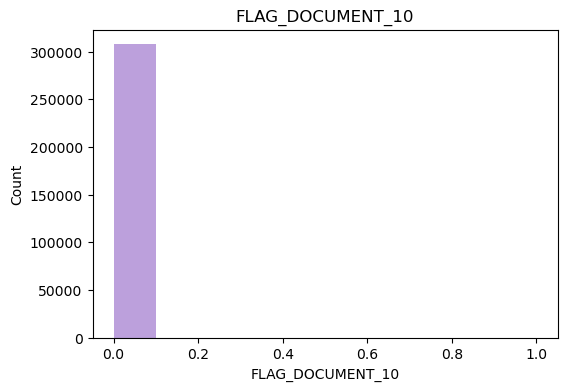

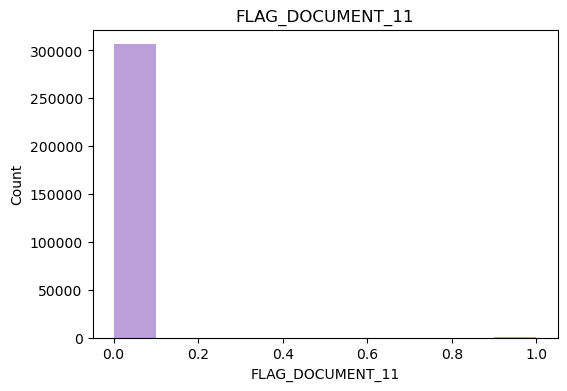

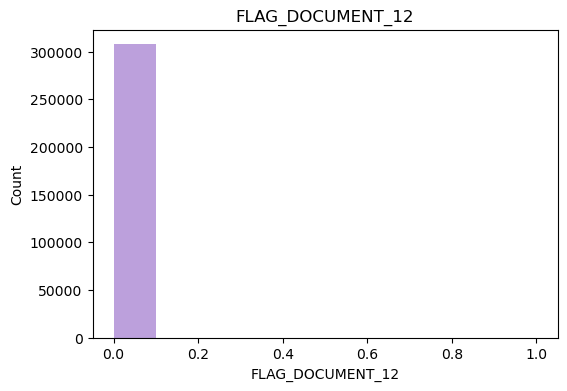

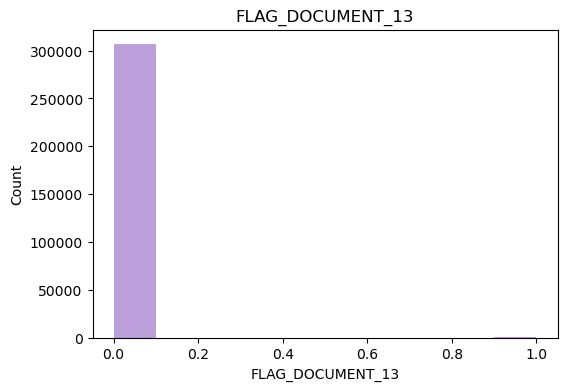

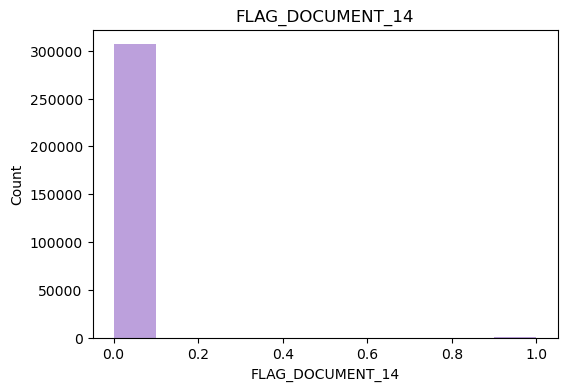

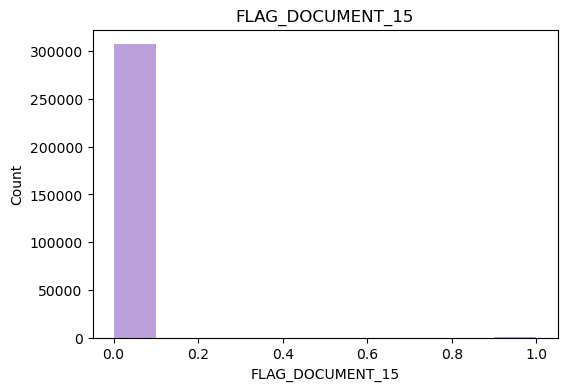

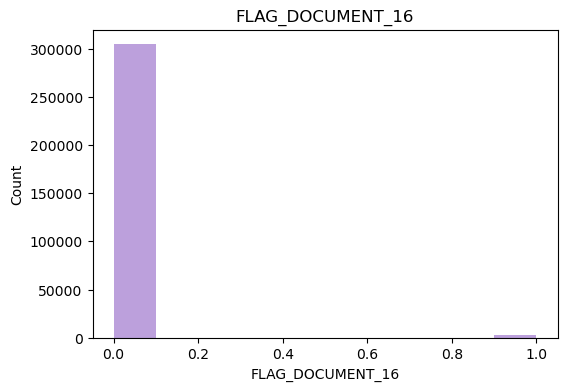

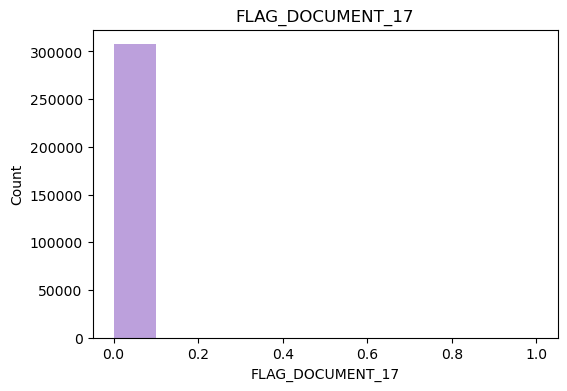

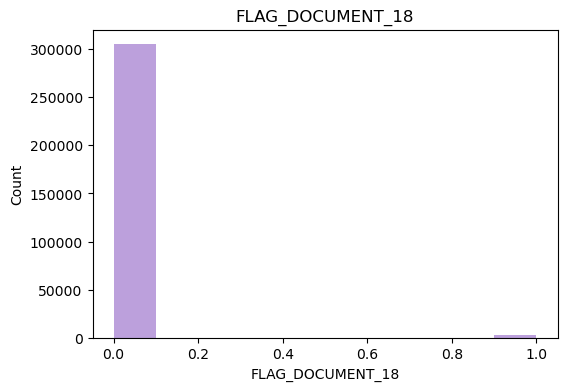

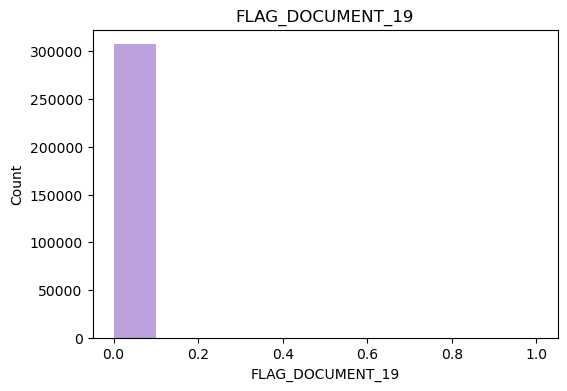

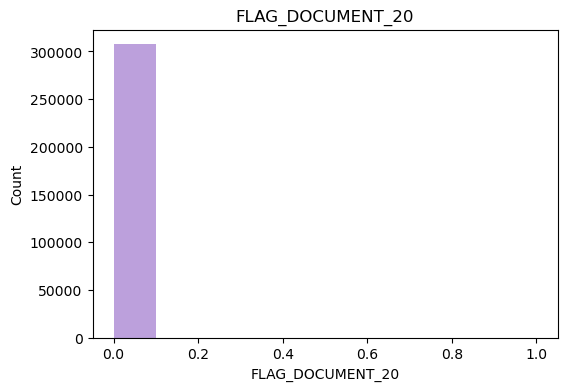

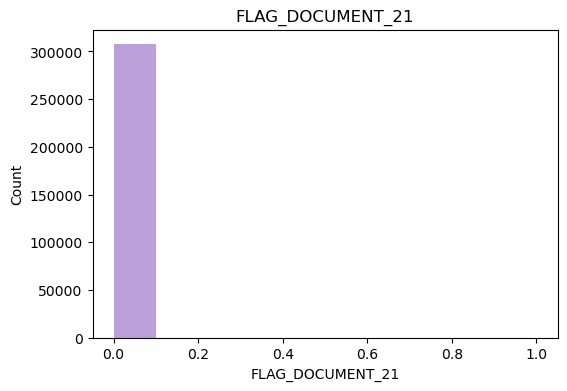

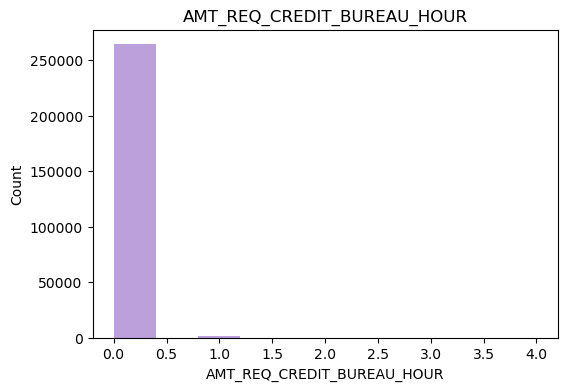

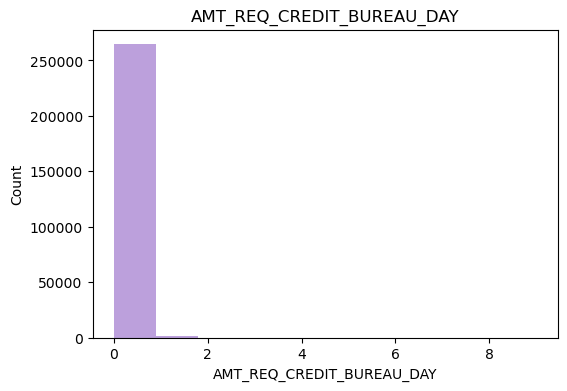

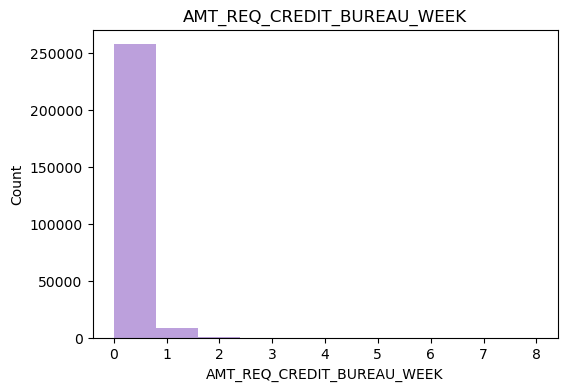

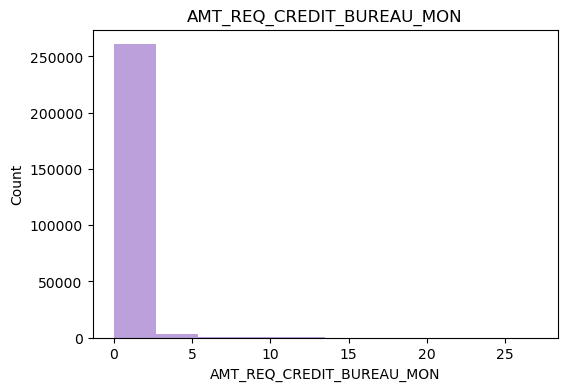

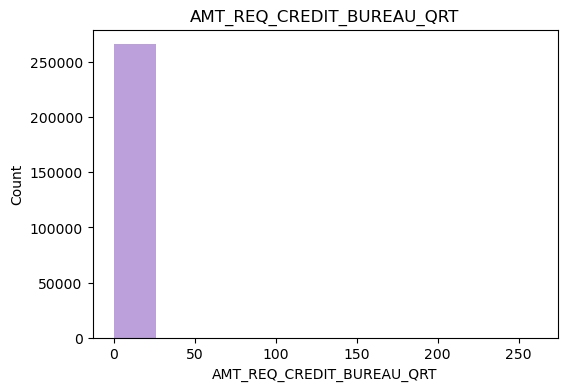

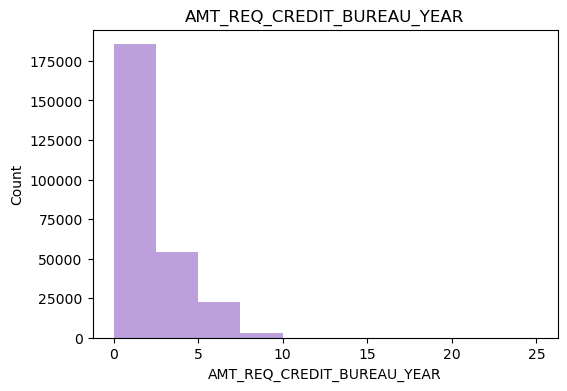

In [28]:
for feature in numericalFeatures:
    plt.figure(figsize=(6, 4))
    plt.hist(dataTrain[feature], color="C1")
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

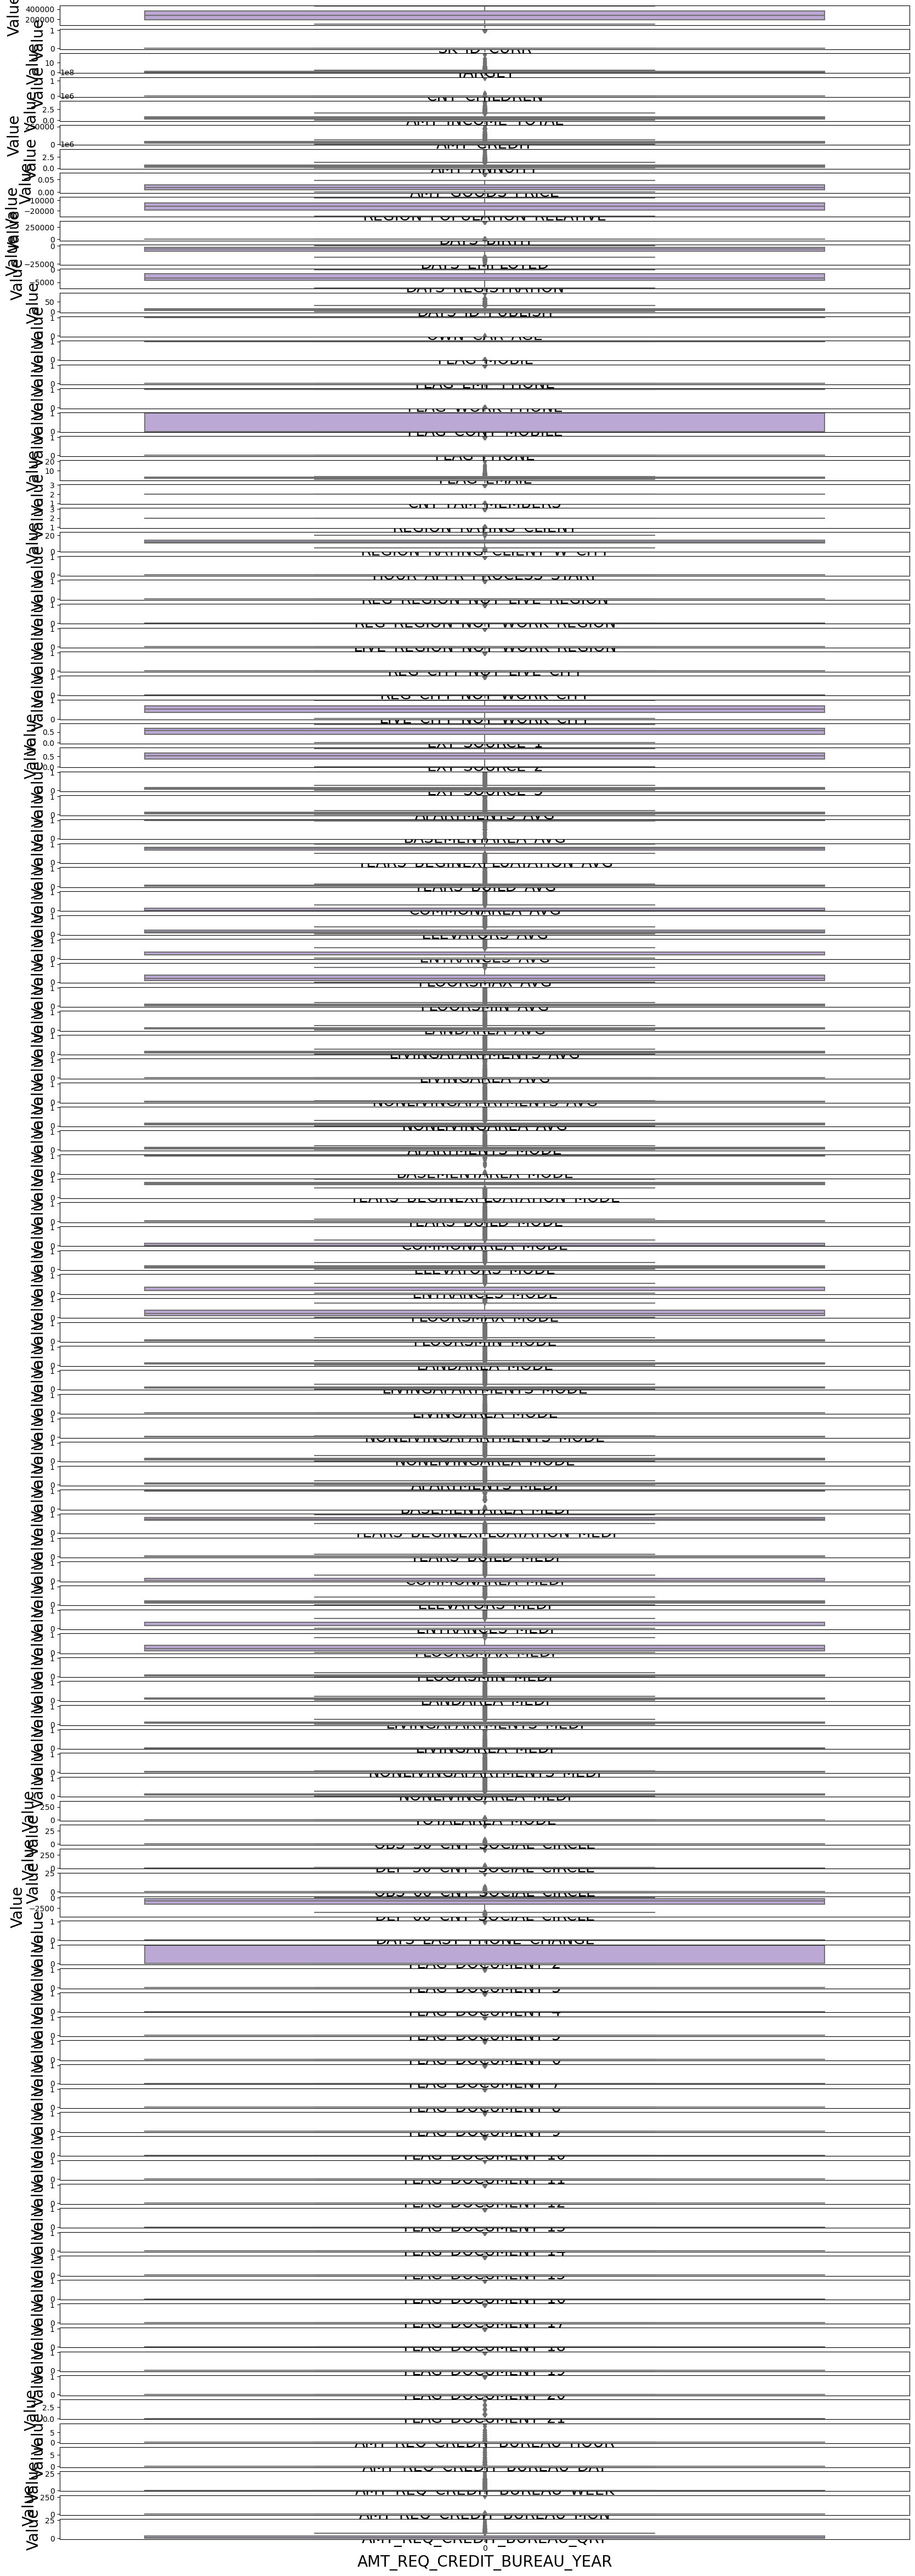

In [29]:
# Створення візуалізації boxplot для числових функцій
# Зображення boxplot для кожної функції у наборі даних
# По осі X - назви числових функцій, а по осі Y - їх значення

# задаємо розміри та кольори для візуалізації
fig, axes = plt.subplots(nrows=len(numericalFeatures), ncols=1, figsize=(20, 60))
color = 'C1'

# ітеруємося по числових функціях та створюємо візуалізацію для кожної з них
for i, col in enumerate(numericalFeatures):
    # задаємо колір та підпис для кожного boxplot
    sns.boxplot(data=dataTrain[col], ax=axes[i], color=color)
    axes[i].set_xlabel(col, fontsize=20)
    axes[i].set_ylabel('Value', fontsize=20)
    
# відображаємо графіки
plt.show()

In [30]:
dataTrain.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Length: 307511, dtype: bool

In [31]:
dataTest.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48739    False
48740    False
48741    False
48742    False
48743    False
Length: 48744, dtype: bool

In [32]:
dataTrain.duplicated().sum()

0

In [33]:
dataTest.duplicated().sum()

0

In [34]:
dataTrain.median()

C:\Users\adyni\AppData\Local\Temp\ipykernel_22004\1589074234.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataTrain.median()


SK_ID_CURR                    278202.0
TARGET                             0.0
CNT_CHILDREN                       0.0
AMT_INCOME_TOTAL              147150.0
AMT_CREDIT                    513531.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         1.0
Length: 106, dtype: float64

In [76]:
dataTest.median()

C:\Users\adyni\AppData\Local\Temp\ipykernel_14552\3754737276.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataTest.median()


SK_ID_CURR                     277549.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               157500.000000
AMT_CREDIT                     450000.000000
AMT_ANNUITY                     26199.000000
AMT_GOODS_PRICE                396000.000000
REGION_POPULATION_RELATIVE          0.018850
DAYS_BIRTH                     -15785.000000
DAYS_EMPLOYED                   -1293.000000
DAYS_REGISTRATION               -4490.000000
DAYS_ID_PUBLISH                 -3234.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            12.000000
REG_REGION_NOT_LIVE_REGION          0.000000
REG_REGION

In [35]:
dataTrain.mode()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002     0.0         Cash loans           F            N   
1           100003     NaN                NaN         NaN          NaN   
2           100004     NaN                NaN         NaN          NaN   
3           100006     NaN                NaN         NaN          NaN   
4           100007     NaN                NaN         NaN          NaN   
...            ...     ...                ...         ...          ...   
307506      456251     NaN                NaN         NaN          NaN   
307507      456252     NaN                NaN         NaN          NaN   
307508      456253     NaN                NaN         NaN          NaN   
307509      456254     NaN                NaN         NaN          NaN   
307510      456255     NaN                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y           0.0          135000.0    450000.0   
1                  NaN           NaN               NaN         NaN   
2                  NaN           NaN               NaN         NaN   
3                  NaN           NaN               NaN         NaN   
4                  NaN           NaN               NaN         NaN   
...                ...           ...               ...         ...   
307506             NaN           NaN               NaN         NaN   
307507             NaN           NaN               NaN         NaN   
307508             NaN           NaN               NaN         NaN   
307509             NaN           NaN               NaN         NaN   
307510             NaN           NaN               NaN         NaN   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0            9000.0  ...               0.0              0.0              0.0   
1               NaN  ...               NaN              NaN              NaN   
2               NaN  ...               NaN              NaN              NaN   
3               NaN  ...               NaN              NaN              NaN   
4               NaN  ...               NaN              NaN              NaN   
...             ...  ...               ...              ...              ...   
307506          NaN  ...               NaN              NaN              NaN   
307507          NaN  ...               NaN              NaN              NaN   
307508          NaN  ...               NaN              NaN              NaN   
307509          NaN  ...               NaN              NaN              NaN   
307510          NaN  ...               NaN              NaN              NaN   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                   0.0                        0.0                       0.0   
1                   NaN                        NaN                       NaN   
2                   NaN                        NaN                       NaN   
3                   NaN                        NaN                       NaN   
4                   NaN                        NaN                       NaN   
...                 ...                        ...                       ...   
307506              NaN                        NaN                       NaN   
307507              NaN                        NaN                       NaN   
307508              NaN                        NaN                       NaN   
307509              NaN                        NaN                       NaN   
307510              NaN                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              

In [36]:
dataTest.mode()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005                NaN         NaN          NaN             NaN   
2          100013                NaN         NaN          NaN             NaN   
3          100028                NaN         NaN          NaN             NaN   
4          100038                NaN         NaN          NaN             NaN   
...           ...                ...         ...          ...             ...   
48739      456221                NaN         NaN          NaN             NaN   
48740      456222                NaN         NaN          NaN             NaN   
48741      456223                NaN         NaN          NaN             NaN   
48742      456224                NaN         NaN          NaN             NaN   
48743      456250                NaN         NaN          NaN             NaN   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               0.0          135000.0    450000.0      27652.5   
1               NaN               NaN         NaN          NaN   
2               NaN               NaN         NaN          NaN   
3               NaN               NaN         NaN          NaN   
4               NaN               NaN         NaN          NaN   
...             ...               ...         ...          ...   
48739           NaN               NaN         NaN          NaN   
48740           NaN               NaN         NaN          NaN   
48741           NaN               NaN         NaN          NaN   
48742           NaN               NaN         NaN          NaN   
48743           NaN               NaN         NaN          NaN   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...              0.0              0.0   
1                  NaN  ...              NaN              NaN   
2                  NaN  ...              NaN              NaN   
3                  NaN  ...              NaN              NaN   
4                  NaN  ...              NaN              NaN   
...                ...  ...              ...              ...   
48739              NaN  ...              NaN              NaN   
48740              NaN  ...              NaN              NaN   
48741              NaN  ...              NaN              NaN   
48742              NaN  ...              NaN              NaN   
48743              NaN  ...              NaN              NaN   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  0.0              0.0                        0.0   
1                  NaN              NaN                        NaN   
2                  NaN              NaN                        NaN   
3                  NaN              NaN                        NaN   
4                  NaN              NaN                        NaN   
...                ...              ...                        ...   
48739              NaN              NaN                        NaN   
48740              NaN              NaN                        NaN   
48741              NaN              NaN                        NaN   
48742              NaN              NaN                        NaN   
48743              NaN              NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   
...                          ...                         ...   
48739                        NaN                         NaN   
48740                        NaN                         NaN   
48741                        NaN           

C:\Users\adyni\AppData\Local\Temp\ipykernel_22004\1460705154.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataTrain.corr()


<Axes: >

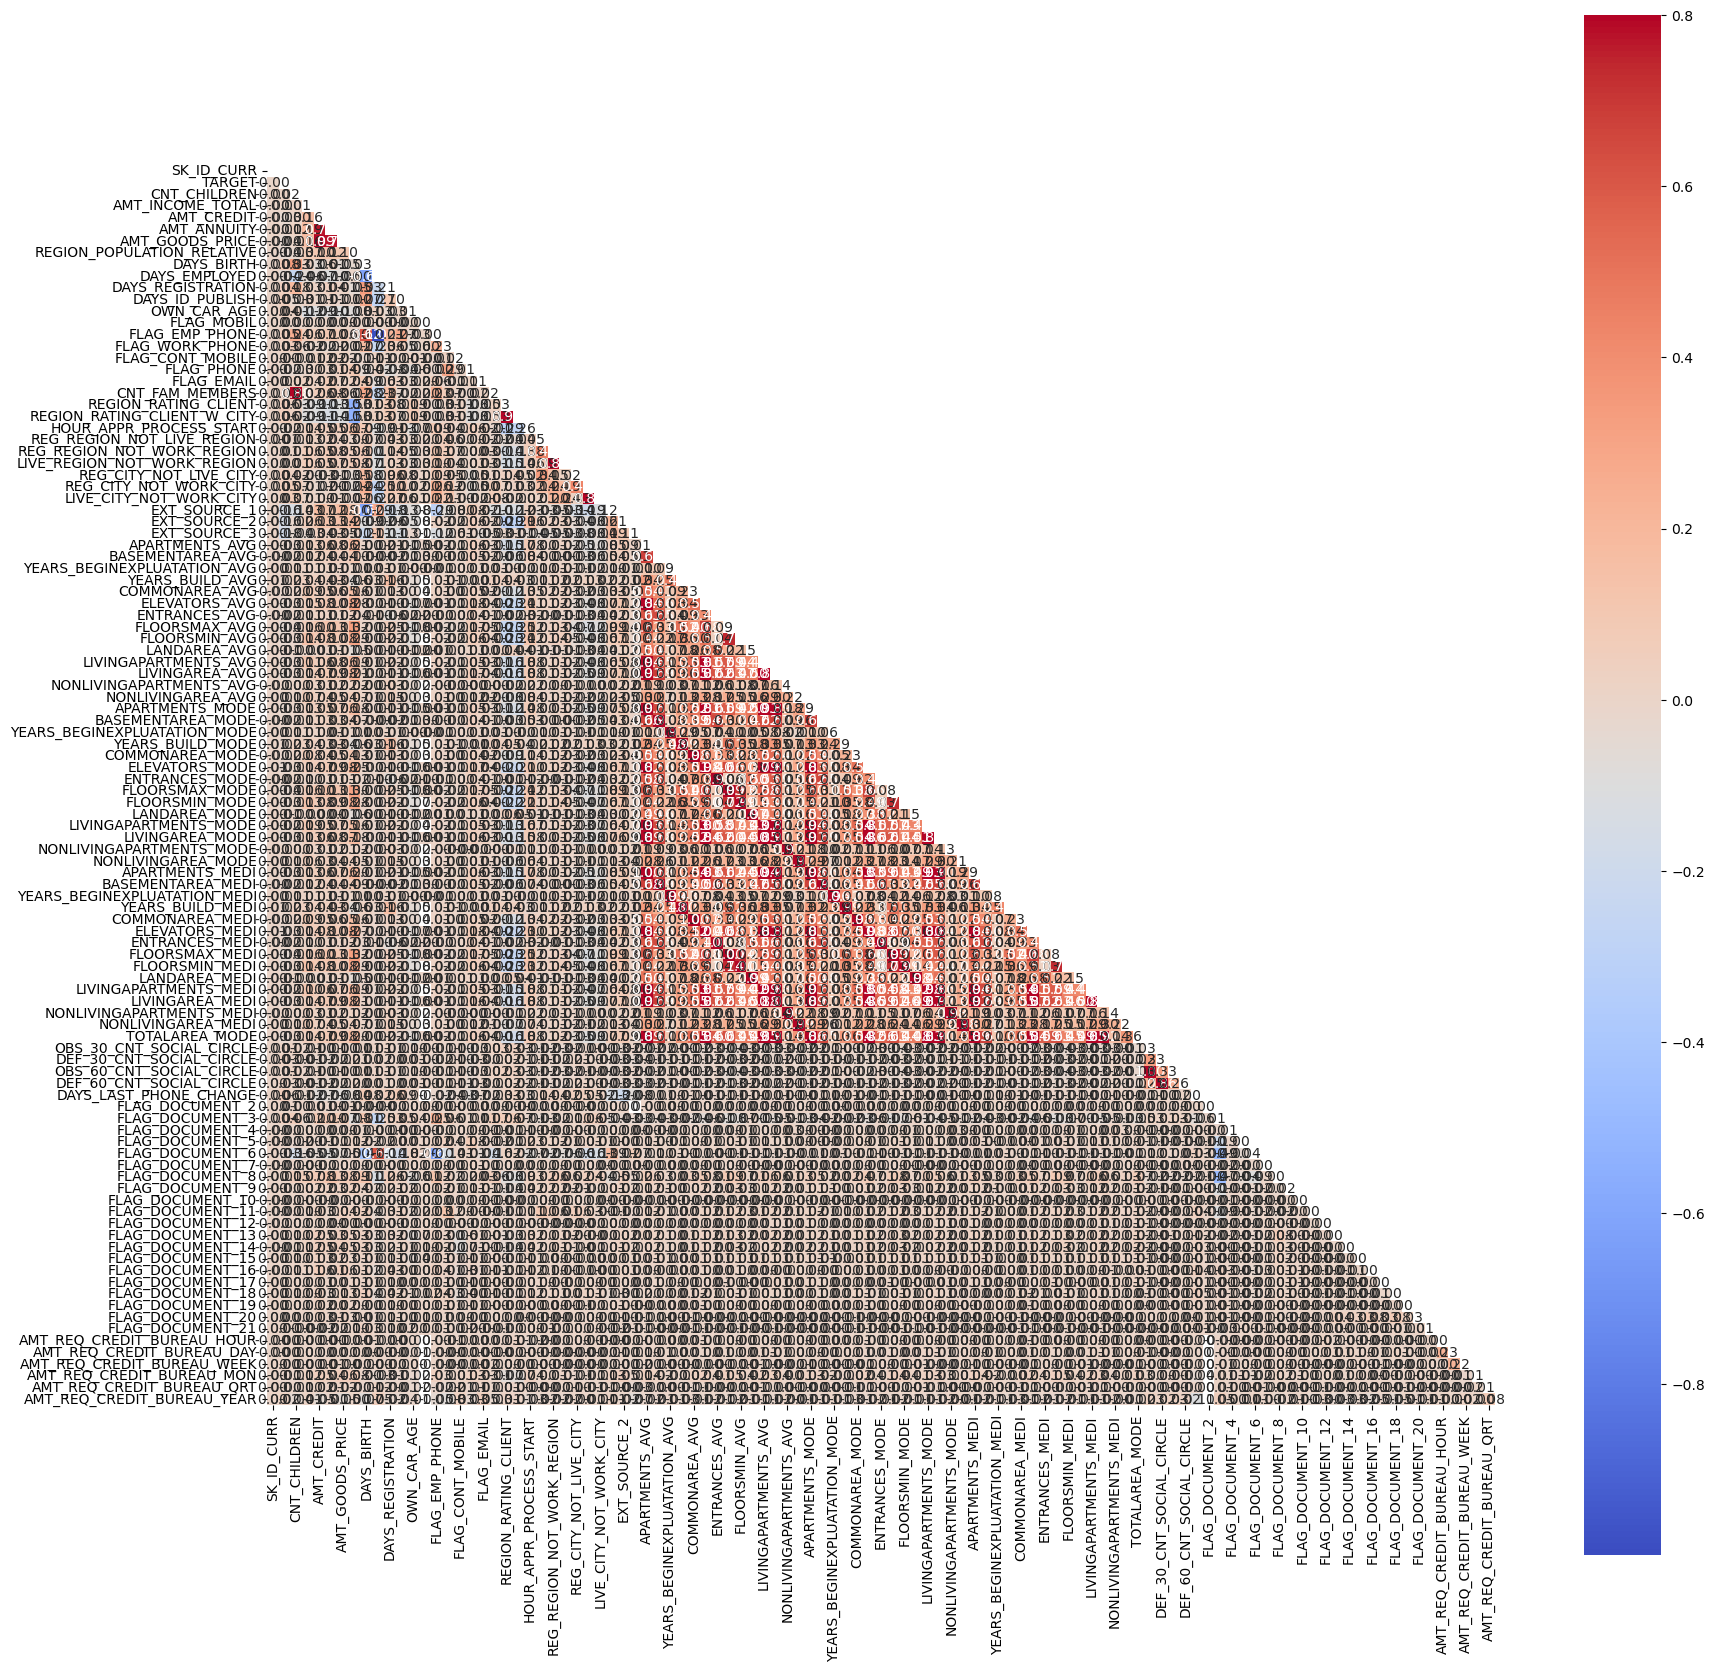

In [37]:
corr_matrix = dataTrain.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.8, annot=True, square=True, fmt='.2f')

In [38]:
#Виділимо кілька фіч, які мають найбільшу кореляцію з TARGET
corr_with_target = corr_matrix['TARGET'].abs().sort_values(ascending=False)
relevant_features = corr_with_target[corr_with_target > 0.1].index.tolist()
relevant_features.append('TARGET')

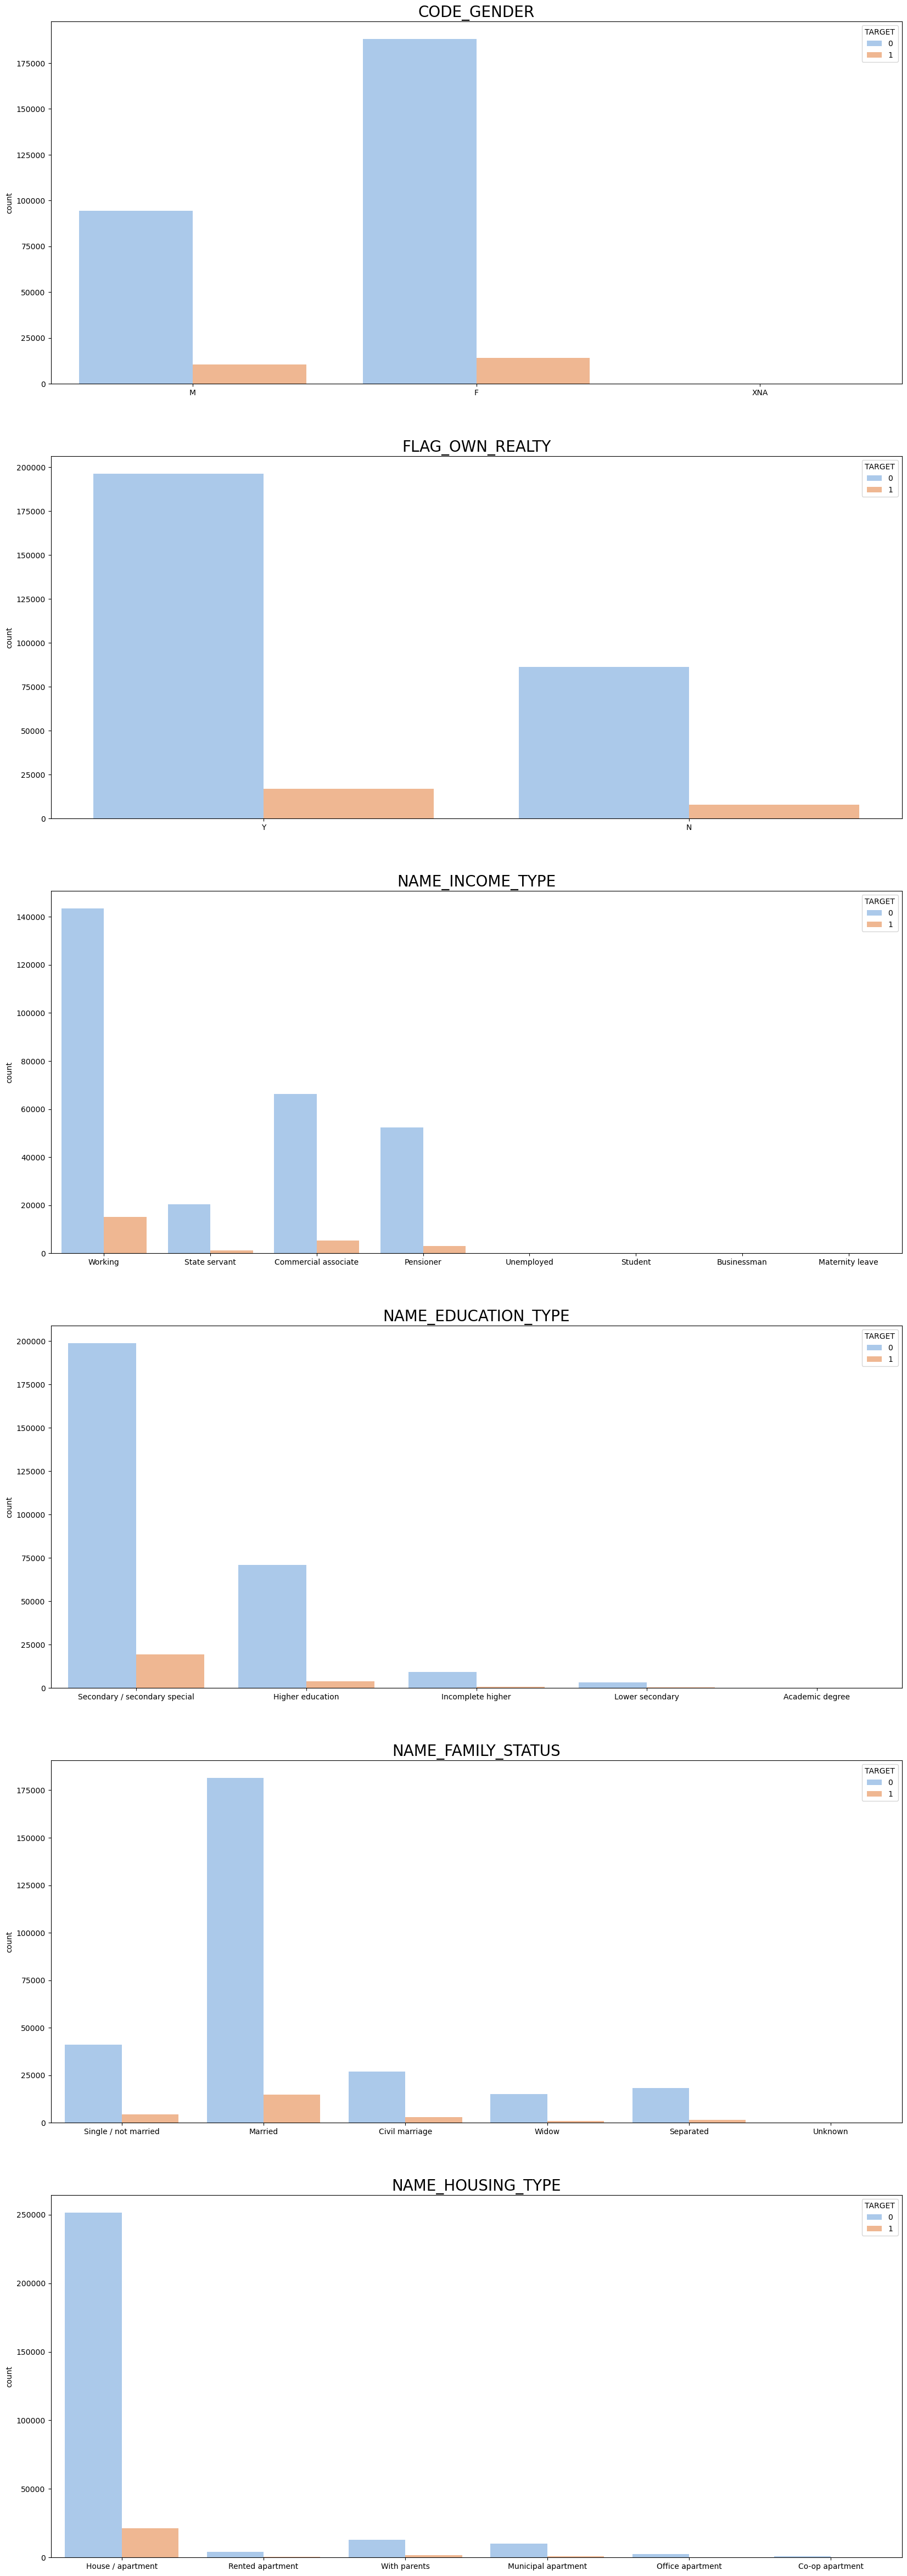

In [39]:
#Подивимось на розподіл категоріальних фіч в датасеті
cat_cols = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(20, 60))
for i, col in enumerate(cat_cols):
    sns.countplot(ax=axes[i], data=dataTrain, x=col, hue='TARGET', palette='pastel')
    axes[i].set_xlabel('')
    axes[i].set_title(col, fontsize=20)

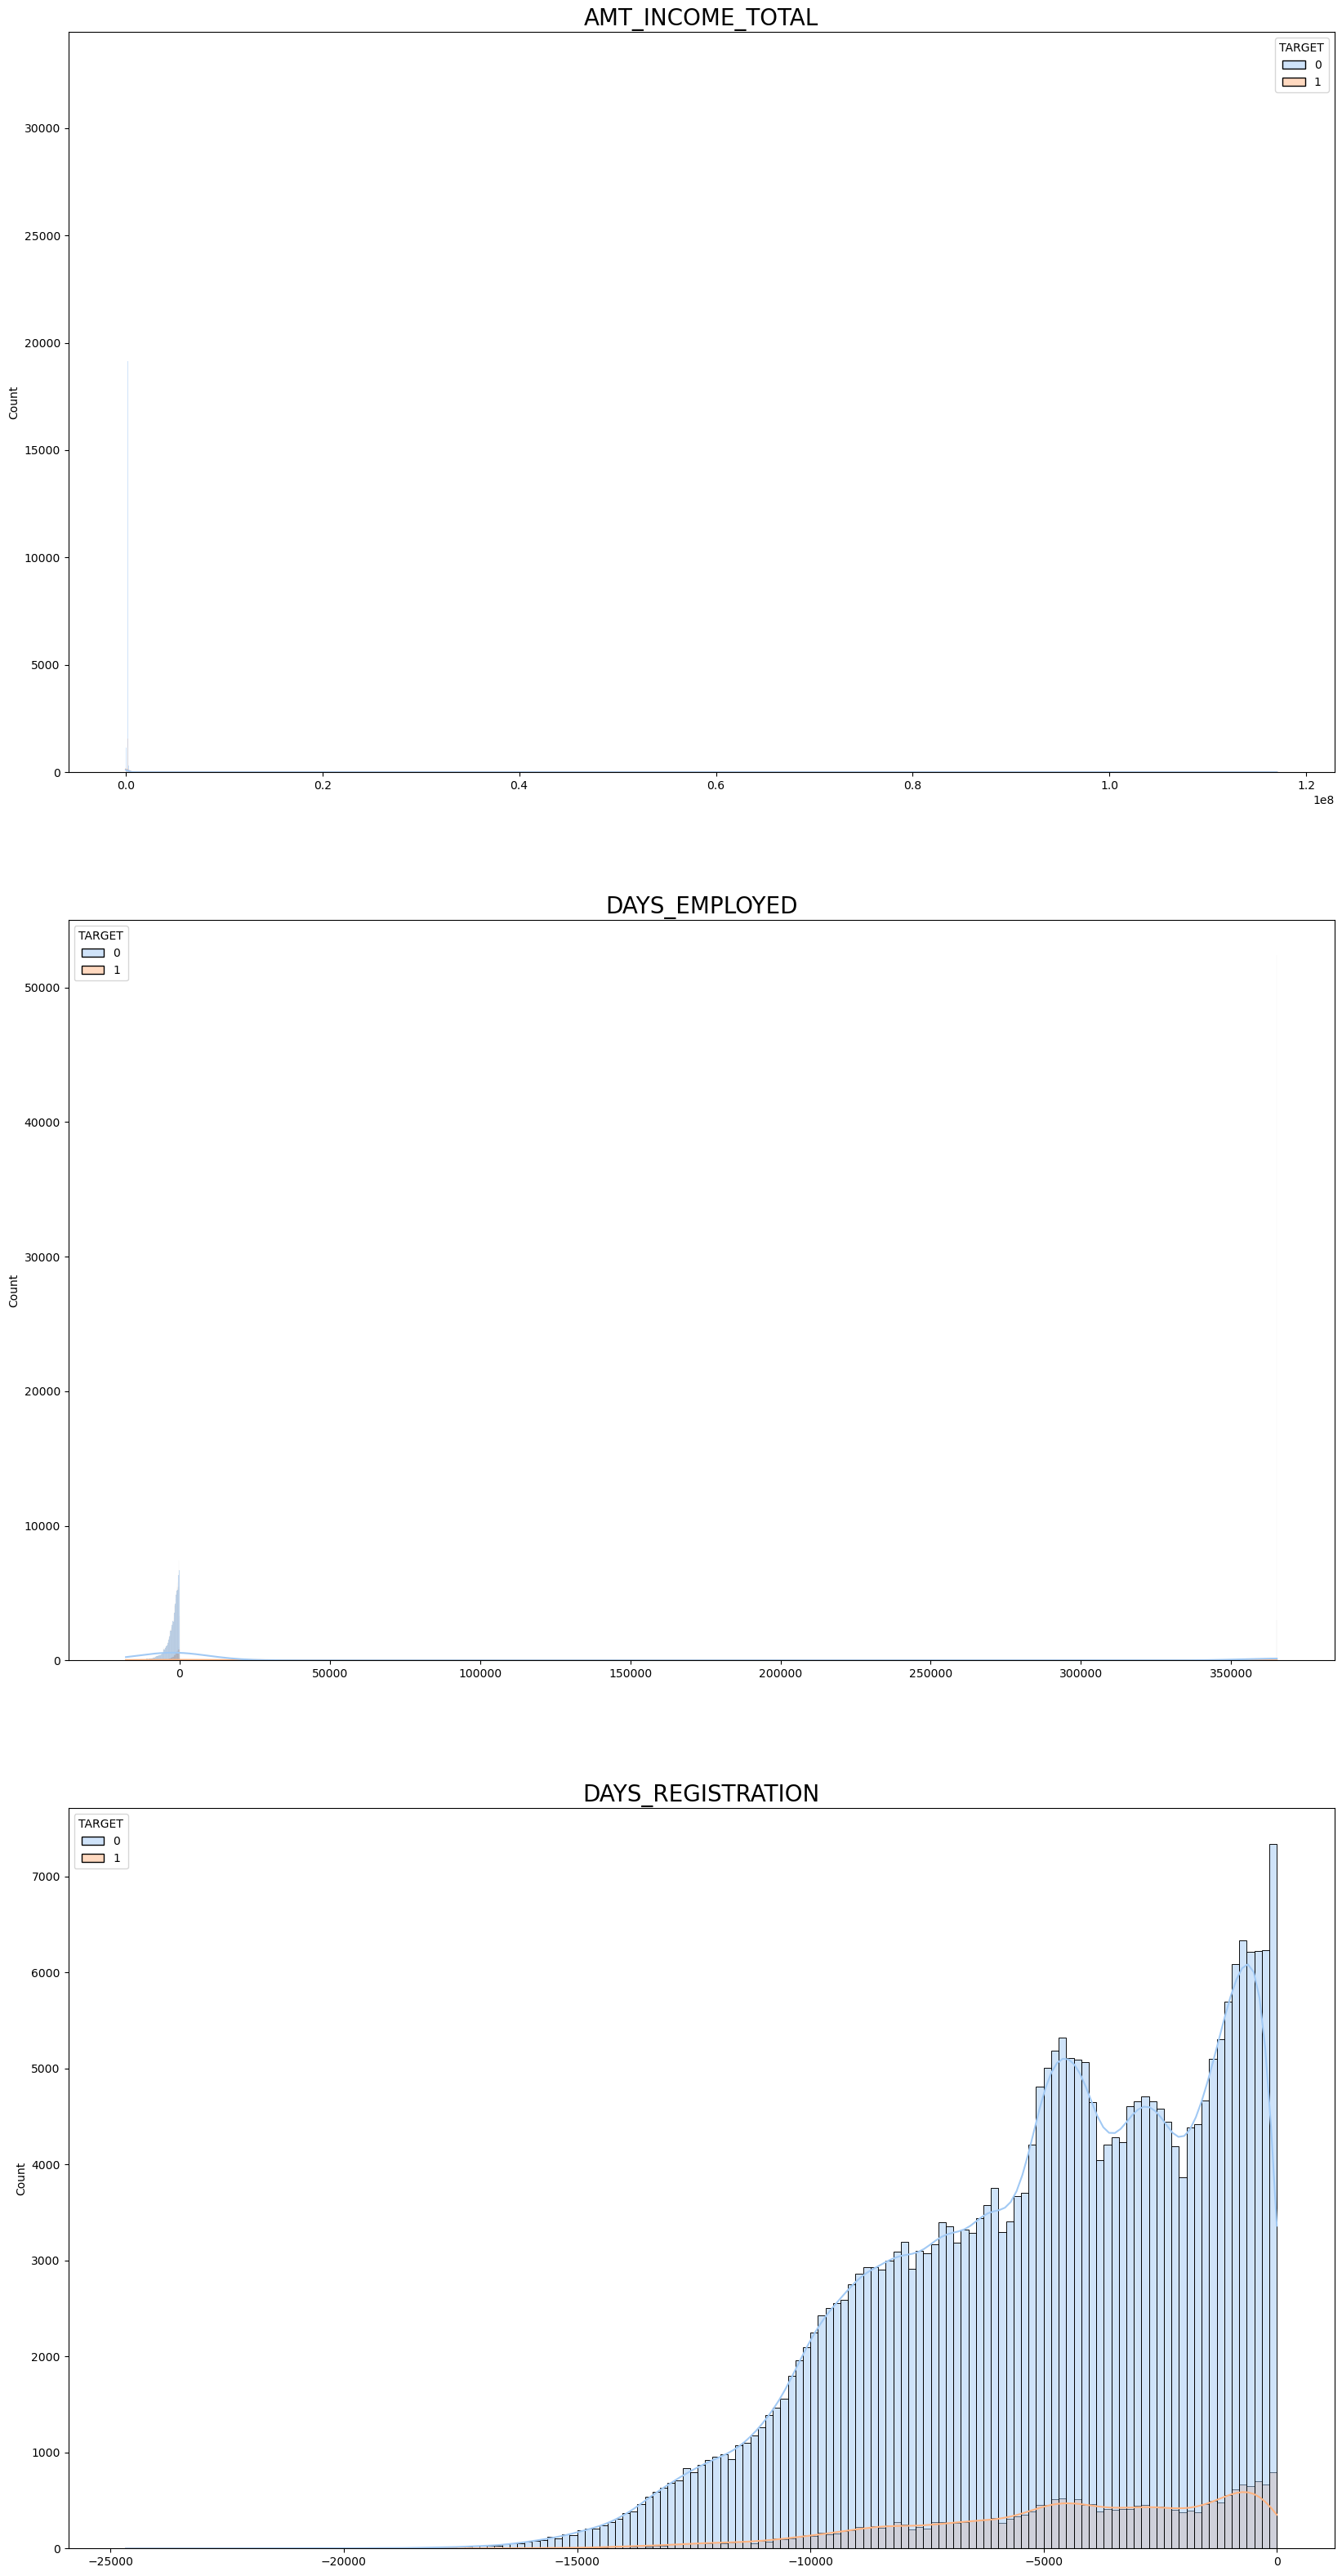

In [40]:
#Подивимось на розподіл числових фіч в датасеті
num_cols = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
fig, axes = plt.subplots(len(num_cols), 1, figsize=(20, 40))
for i, col in enumerate(num_cols):
    sns.histplot(ax=axes[i], data=dataTrain, x=col, hue='TARGET', kde=True, palette='pastel')
    axes[i].set_xlabel('')
    axes[i].set_title(col, fontsize=20)

In [41]:
#Оберемо лише підходящі фічі для класифікації
train = dataTrain[relevant_features]
print(train.columns)

Index(['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'TARGET'], dtype='object')


In [42]:
train = dataTrain[["TARGET", "CODE_GENDER", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "FLAG_EMAIL", "NAME_FAMILY_STATUS",
"AMT_INCOME_TOTAL", "NAME_HOUSING_TYPE", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "FLAG_MOBIL", "LIVE_CITY_NOT_WORK_CITY"
]]

#Визначаємо категоріальні та числові ознаки
categorical = train.select_dtypes(include=["object"]).columns
numerical = train.select_dtypes(include=["float64", "int64"]).columns
columns = train.columns

In [43]:
#Виводимо назви колонок та типи ознак
print("Columns: ", columns)
print("Categorical features: ", categorical)
print("Numerical features: ", numerical)

Columns:  Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'FLAG_EMAIL', 'NAME_FAMILY_STATUS',
       'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_MOBIL', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')
Categorical features:  Index(['CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
      dtype='object')
Numerical features:  Index(['TARGET', 'FLAG_EMAIL', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'FLAG_MOBIL', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')


In [44]:
# класифікуємо дані

# визначаємо трансформатор для категоріальних та числових змінних
transformer = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder(), categorical),
        ("numerical", StandardScaler(), numerical.drop("TARGET"))
    ],
)

# обробляємо тренувальні дані
train_features = train.drop("TARGET", axis=1)
fit_train_data = pd.DataFrame(transformer.fit_transform(train_features))

# вибираємо стовпці для класифікації
classifying_columns = train.columns.drop("TARGET")

# обробляємо тестові дані
test_features = dataTest[classifying_columns]
fit_test_data = pd.DataFrame(transformer.transform(test_features))

# виводимо результати
print('\033[1m' + "Transformed test dataset:" + '\033[0m')
display(fit_test_data.head())

Transformed test dataset:


0    1    2    3    4    5    6    7    8    9   ...   26   27   28   29  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

         30        31        32        33        34        35  
0  4.078050 -0.142533 -0.468192 -0.052196  0.001803 -0.467814  
1 -0.245215 -0.294354 -0.483339 -1.172870  0.001803 -0.467814  
2 -0.245215  0.142129 -0.483262  0.797961  0.001803 -0.467814  
3 -0.245215  0.616567 -0.464915  0.847636  0.001803 -0.467814  
4 -0.245215  0.047242 -0.467215  0.279919  0.001803  2.137601  

[5 rows x 36 columns]

In [45]:
trainX = fit_train_data
trainY = train['TARGET']
trainSplitX, validateX, trainSplitY, validateY = train_test_split(trainX, trainY, test_size=0.1)

#Ініціалізуємо модель логістичної регресії з вагами "balanced" та максимальною кількістю ітерацій 2000
classifyingModel = LogisticRegression(class_weight="balanced", max_iter=2000)

#Тренуємо модель на тренувальній вибірці
classifyingModel.fit(trainSplitX, trainSplitY)

#Передбачаємо значення на тренувальній вибірці та валідаційній вибірці
train_predictions = classifyingModel.predict(trainSplitX)
val_predictions = classifyingModel.predict(validateX)

#Оцінюємо якість моделі на тренувальній вибірці та валідаційній вибірці
train_accuracy = accuracy_score(trainSplitY, train_predictions)
train_roc_auc = roc_auc_score(trainSplitY, train_predictions)

val_accuracy = accuracy_score(validateY, val_predictions)
val_roc_auc = roc_auc_score(validateY, val_predictions)

#Вивід результатів
print(f"{'TRAINING RESULTS':^40s}")
print(f"{'Accuracy score:':<20s}{train_accuracy:>20.4f}")
print(f"{'ROC_AUC score:':<20s}{train_roc_auc:>20.4f}")
print("\n")
print(f"{'VALIDATION RESULTS':^40s}")
print(f"{'Accuracy score:':<20s}{val_accuracy:>20.4f}")
print(f"{'ROC_AUC score:':<20s}{val_roc_auc:>20.4f}")

            TRAINING RESULTS            
Accuracy score:                   0.5801
ROC_AUC score:                    0.5963


           VALIDATION RESULTS           
Accuracy score:                   0.5739
ROC_AUC score:                    0.5911


In [57]:
test_predictions = classifyingModel.predict(fit_test_data)

with open('submission.csv', 'w', newline='') as submission_file:
    writer = csv.writer(submission_file)
    writer.writerow(['SK_ID_CURR', 'TARGET'])
    for i in range(len(test_predictions)):
        writer.writerow([dataTest["SK_ID_CURR"].iloc[i], test_predictions[i]])